#### This small project is conducted in partial fulfillment of the Google Data Analytics Certificate.

#### Background:

Cyclistic is a fictitious bike-share company in Chicago. The marketing department of Cyclistic wants to study the behavior of casual riders and annual members to obtain a higher conversion rate from casual-borrow to membership. Basing on such customer insight, the team will devise the proper marketing strategy.

#### Dataset:
- Cyclistic dataset (week 2, Google Data Analytics Capstone: Complete a case study)
- The data has been made available by Motivate International Inc. 
https://www.divvybikes.com/data-license-agreement

#### 1. Import relevant packages

In [123]:
import pandas as pd
import numpy as np

#### 2. Aggregate all monthly files into a single dataframe, calculate trip length and create 'date_of_week' array

In [124]:
import glob

path = r'/Users/hongnhungvu/Desktop/Cycling data/Trip_data' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col = None, header = 0)
    li.append(df)

df_trips = pd.concat(li, axis = 0, ignore_index = True)
df_trips

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110,St. Clair St & Erie St,211,41.894177,-87.629127,41.894434,-87.623379,casual
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672,Noble St & Milwaukee Ave,29,41.890959,-87.635343,41.900675,-87.662480,casual
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76,Federal St & Polk St,41,41.880983,-87.616754,41.872054,-87.629550,casual
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659,Stave St & Armitage Ave,185,41.895499,-87.682013,41.917744,-87.691392,casual
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2,Buckingham Fountain,2,41.876497,-87.620358,41.876448,-87.620338,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5910611,EF56D7D1D612AC11,electric_bike,2021-05-20 16:32:14,2021-05-20 16:35:39,Blackstone Ave & Hyde Park Blvd,13398,NaN,NaN,41.802581,-87.590230,41.800000,-87.600000,member
5910612,745191CB9F21DE3C,classic_bike,2021-05-29 16:40:37,2021-05-29 17:22:37,Sheridan Rd & Montrose Ave,TA1307000107,Michigan Ave & Oak St,13042,41.961670,-87.654640,41.900960,-87.623777,casual
5910613,428575BAA5356BFF,electric_bike,2021-05-31 14:24:54,2021-05-31 14:31:38,Sheridan Rd & Montrose Ave,TA1307000107,NaN,NaN,41.961525,-87.654651,41.950000,-87.650000,member
5910614,FC8A4A7AB7249662,electric_bike,2021-05-25 16:01:33,2021-05-25 16:07:37,Sheridan Rd & Montrose Ave,TA1307000107,NaN,NaN,41.961654,-87.654721,41.980000,-87.660000,member


In [125]:
#Check the descriptive statistics
df_trips.describe(include="all")

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
count,5910616,5910616,5910616,5910616,5541285,5540660,5501461,5501000,5.910616e+06,5.910616e+06,5.903711e+06,5.903711e+06,5910616
unique,5910407,3,5035619,5021291,749,1382,746,1379,NaN,NaN,NaN,NaN,2
top,D47305CAB26FD130,docked_bike,2020-07-12 13:16:59,2020-07-15 11:44:46,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,NaN,NaN,NaN,NaN,member
freq,2,2735950,12,18,80028,47582,82626,48060,NaN,NaN,NaN,NaN,3273986
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.190359e+01,-8.764486e+01,4.190388e+01,-8.764512e+01,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.370845e-02,2.609585e-02,4.381493e-02,2.625305e-02,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.164000e+01,-8.787000e+01,4.151000e+01,-8.807000e+01,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.188224e+01,-8.765887e+01,4.188279e+01,-8.765916e+01,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.190000e+01,-8.764117e+01,4.190030e+01,-8.764170e+01,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.192955e+01,-8.762769e+01,4.192957e+01,-8.762772e+01,NaN


In [126]:
#Check the data types of all columns
df_trips.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [127]:
#Transform data type of starting time and ending time to datetime

df_trips['started_at'] = pd.to_datetime(df_trips['started_at'])
df_trips['ended_at'] = pd.to_datetime(df_trips['ended_at'])

from datetime import datetime

#Calculate trip length and store values into 'diff' array
diff = df_trips['ended_at'] - df_trips['started_at']
diff

0         0 days 00:09:40
1         0 days 00:11:19
2         0 days 00:29:01
3         0 days 00:09:15
4         0 days 00:33:27
                ...      
5910611   0 days 00:03:25
5910612   0 days 00:42:00
5910613   0 days 00:06:44
5910614   0 days 00:06:04
5910615   0 days 00:08:13
Length: 5910616, dtype: timedelta64[ns]

In [128]:
#As could be observed from 'diff' array, the trip length from this dataset does not exceed 24 and often hover around half an hour.
#Thus, trip length is measured in hours in the following calculation then stored in 'hour_length'

df_trips['trip_length'] = np.array((diff.dt.components.days*24 + diff.dt.components.hours).astype(str).str.zfill(2) + ':' + diff.dt.components.minutes.astype(str).str.zfill(2) + ':' + diff.dt.components.seconds.astype(str).str.zfill(2))

df_trips['trip_length'] = pd.to_datetime(df_trips['trip_length'], errors = 'coerce').dt.time

df_trips['hour_length'] = np.array((diff.dt.components.days*24 + diff.dt.components.hours) + diff.dt.components.minutes/60 + diff.dt.components.seconds/3600)

df_trips

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_length,hour_length
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110,St. Clair St & Erie St,211,41.894177,-87.629127,41.894434,-87.623379,casual,00:09:40,0.161111
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672,Noble St & Milwaukee Ave,29,41.890959,-87.635343,41.900675,-87.662480,casual,00:11:19,0.188611
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76,Federal St & Polk St,41,41.880983,-87.616754,41.872054,-87.629550,casual,00:29:01,0.483611
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659,Stave St & Armitage Ave,185,41.895499,-87.682013,41.917744,-87.691392,casual,00:09:15,0.154167
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2,Buckingham Fountain,2,41.876497,-87.620358,41.876448,-87.620338,casual,00:33:27,0.557500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5910611,EF56D7D1D612AC11,electric_bike,2021-05-20 16:32:14,2021-05-20 16:35:39,Blackstone Ave & Hyde Park Blvd,13398,NaN,NaN,41.802581,-87.590230,41.800000,-87.600000,member,00:03:25,0.056944
5910612,745191CB9F21DE3C,classic_bike,2021-05-29 16:40:37,2021-05-29 17:22:37,Sheridan Rd & Montrose Ave,TA1307000107,Michigan Ave & Oak St,13042,41.961670,-87.654640,41.900960,-87.623777,casual,00:42:00,0.700000
5910613,428575BAA5356BFF,electric_bike,2021-05-31 14:24:54,2021-05-31 14:31:38,Sheridan Rd & Montrose Ave,TA1307000107,NaN,NaN,41.961525,-87.654651,41.950000,-87.650000,member,00:06:44,0.112222
5910614,FC8A4A7AB7249662,electric_bike,2021-05-25 16:01:33,2021-05-25 16:07:37,Sheridan Rd & Montrose Ave,TA1307000107,NaN,NaN,41.961654,-87.654721,41.980000,-87.660000,member,00:06:04,0.101111


In [129]:
#Create a column which indicates date of the week 
#We will use this array later to plot the trends of trip length and rideable types later on casual riders and member riders

df_trips['started_at'] = pd.to_datetime(df_trips['started_at'])
df_trips['day_of_week'] = df_trips['started_at'].dt.dayofweek

days = {0:'Mon',1:'Tues',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
df_trips['day_of_week'] = df_trips['day_of_week'].apply(lambda x: days[x])

df_trips

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_length,hour_length,day_of_week
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110,St. Clair St & Erie St,211,41.894177,-87.629127,41.894434,-87.623379,casual,00:09:40,0.161111,Sun
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672,Noble St & Milwaukee Ave,29,41.890959,-87.635343,41.900675,-87.662480,casual,00:11:19,0.188611,Sun
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76,Federal St & Polk St,41,41.880983,-87.616754,41.872054,-87.629550,casual,00:29:01,0.483611,Sun
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659,Stave St & Armitage Ave,185,41.895499,-87.682013,41.917744,-87.691392,casual,00:09:15,0.154167,Sun
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2,Buckingham Fountain,2,41.876497,-87.620358,41.876448,-87.620338,casual,00:33:27,0.557500,Sun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5910611,EF56D7D1D612AC11,electric_bike,2021-05-20 16:32:14,2021-05-20 16:35:39,Blackstone Ave & Hyde Park Blvd,13398,NaN,NaN,41.802581,-87.590230,41.800000,-87.600000,member,00:03:25,0.056944,Thur
5910612,745191CB9F21DE3C,classic_bike,2021-05-29 16:40:37,2021-05-29 17:22:37,Sheridan Rd & Montrose Ave,TA1307000107,Michigan Ave & Oak St,13042,41.961670,-87.654640,41.900960,-87.623777,casual,00:42:00,0.700000,Sat
5910613,428575BAA5356BFF,electric_bike,2021-05-31 14:24:54,2021-05-31 14:31:38,Sheridan Rd & Montrose Ave,TA1307000107,NaN,NaN,41.961525,-87.654651,41.950000,-87.650000,member,00:06:44,0.112222,Mon
5910614,FC8A4A7AB7249662,electric_bike,2021-05-25 16:01:33,2021-05-25 16:07:37,Sheridan Rd & Montrose Ave,TA1307000107,NaN,NaN,41.961654,-87.654721,41.980000,-87.660000,member,00:06:04,0.101111,Tues


In [130]:
#Eliminate all flawed records whose hour_length is less or equal to 0

df_trips = df_trips[-df_trips['hour_length']<=0]

df_trips

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_length,hour_length,day_of_week
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110,St. Clair St & Erie St,211,41.894177,-87.629127,41.894434,-87.623379,casual,00:09:40,0.161111,Sun
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672,Noble St & Milwaukee Ave,29,41.890959,-87.635343,41.900675,-87.662480,casual,00:11:19,0.188611,Sun
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76,Federal St & Polk St,41,41.880983,-87.616754,41.872054,-87.629550,casual,00:29:01,0.483611,Sun
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659,Stave St & Armitage Ave,185,41.895499,-87.682013,41.917744,-87.691392,casual,00:09:15,0.154167,Sun
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2,Buckingham Fountain,2,41.876497,-87.620358,41.876448,-87.620338,casual,00:33:27,0.557500,Sun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5910611,EF56D7D1D612AC11,electric_bike,2021-05-20 16:32:14,2021-05-20 16:35:39,Blackstone Ave & Hyde Park Blvd,13398,NaN,NaN,41.802581,-87.590230,41.800000,-87.600000,member,00:03:25,0.056944,Thur
5910612,745191CB9F21DE3C,classic_bike,2021-05-29 16:40:37,2021-05-29 17:22:37,Sheridan Rd & Montrose Ave,TA1307000107,Michigan Ave & Oak St,13042,41.961670,-87.654640,41.900960,-87.623777,casual,00:42:00,0.700000,Sat
5910613,428575BAA5356BFF,electric_bike,2021-05-31 14:24:54,2021-05-31 14:31:38,Sheridan Rd & Montrose Ave,TA1307000107,NaN,NaN,41.961525,-87.654651,41.950000,-87.650000,member,00:06:44,0.112222,Mon
5910614,FC8A4A7AB7249662,electric_bike,2021-05-25 16:01:33,2021-05-25 16:07:37,Sheridan Rd & Montrose Ave,TA1307000107,NaN,NaN,41.961654,-87.654721,41.980000,-87.660000,member,00:06:04,0.101111,Tues


In [131]:
#Extract initialising date of rides
df_trips['date_start'] = df_trips['started_at'].dt.date
df_trips

<ipython-input-131-7b5c78aedf9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trips['date_start'] = df_trips['started_at'].dt.date


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_length,hour_length,day_of_week,date_start
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110,St. Clair St & Erie St,211,41.894177,-87.629127,41.894434,-87.623379,casual,00:09:40,0.161111,Sun,2020-11-01
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672,Noble St & Milwaukee Ave,29,41.890959,-87.635343,41.900675,-87.662480,casual,00:11:19,0.188611,Sun,2020-11-01
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76,Federal St & Polk St,41,41.880983,-87.616754,41.872054,-87.629550,casual,00:29:01,0.483611,Sun,2020-11-01
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659,Stave St & Armitage Ave,185,41.895499,-87.682013,41.917744,-87.691392,casual,00:09:15,0.154167,Sun,2020-11-01
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2,Buckingham Fountain,2,41.876497,-87.620358,41.876448,-87.620338,casual,00:33:27,0.557500,Sun,2020-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5910611,EF56D7D1D612AC11,electric_bike,2021-05-20 16:32:14,2021-05-20 16:35:39,Blackstone Ave & Hyde Park Blvd,13398,NaN,NaN,41.802581,-87.590230,41.800000,-87.600000,member,00:03:25,0.056944,Thur,2021-05-20
5910612,745191CB9F21DE3C,classic_bike,2021-05-29 16:40:37,2021-05-29 17:22:37,Sheridan Rd & Montrose Ave,TA1307000107,Michigan Ave & Oak St,13042,41.961670,-87.654640,41.900960,-87.623777,casual,00:42:00,0.700000,Sat,2021-05-29
5910613,428575BAA5356BFF,electric_bike,2021-05-31 14:24:54,2021-05-31 14:31:38,Sheridan Rd & Montrose Ave,TA1307000107,NaN,NaN,41.961525,-87.654651,41.950000,-87.650000,member,00:06:44,0.112222,Mon,2021-05-31
5910614,FC8A4A7AB7249662,electric_bike,2021-05-25 16:01:33,2021-05-25 16:07:37,Sheridan Rd & Montrose Ave,TA1307000107,NaN,NaN,41.961654,-87.654721,41.980000,-87.660000,member,00:06:04,0.101111,Tues,2021-05-25


#### 3. Visualisation to find trends and patterns

In [132]:
#Import graphing packages

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "darkgrid")
sns.set(rc={"figure.figsize": (16, 8)})
plt.rcParams['figure.dpi'] = 360

#### Trends of ride counts and ride length in the year

[Text(0.5, 1.0, 'Number of rides in a year')]

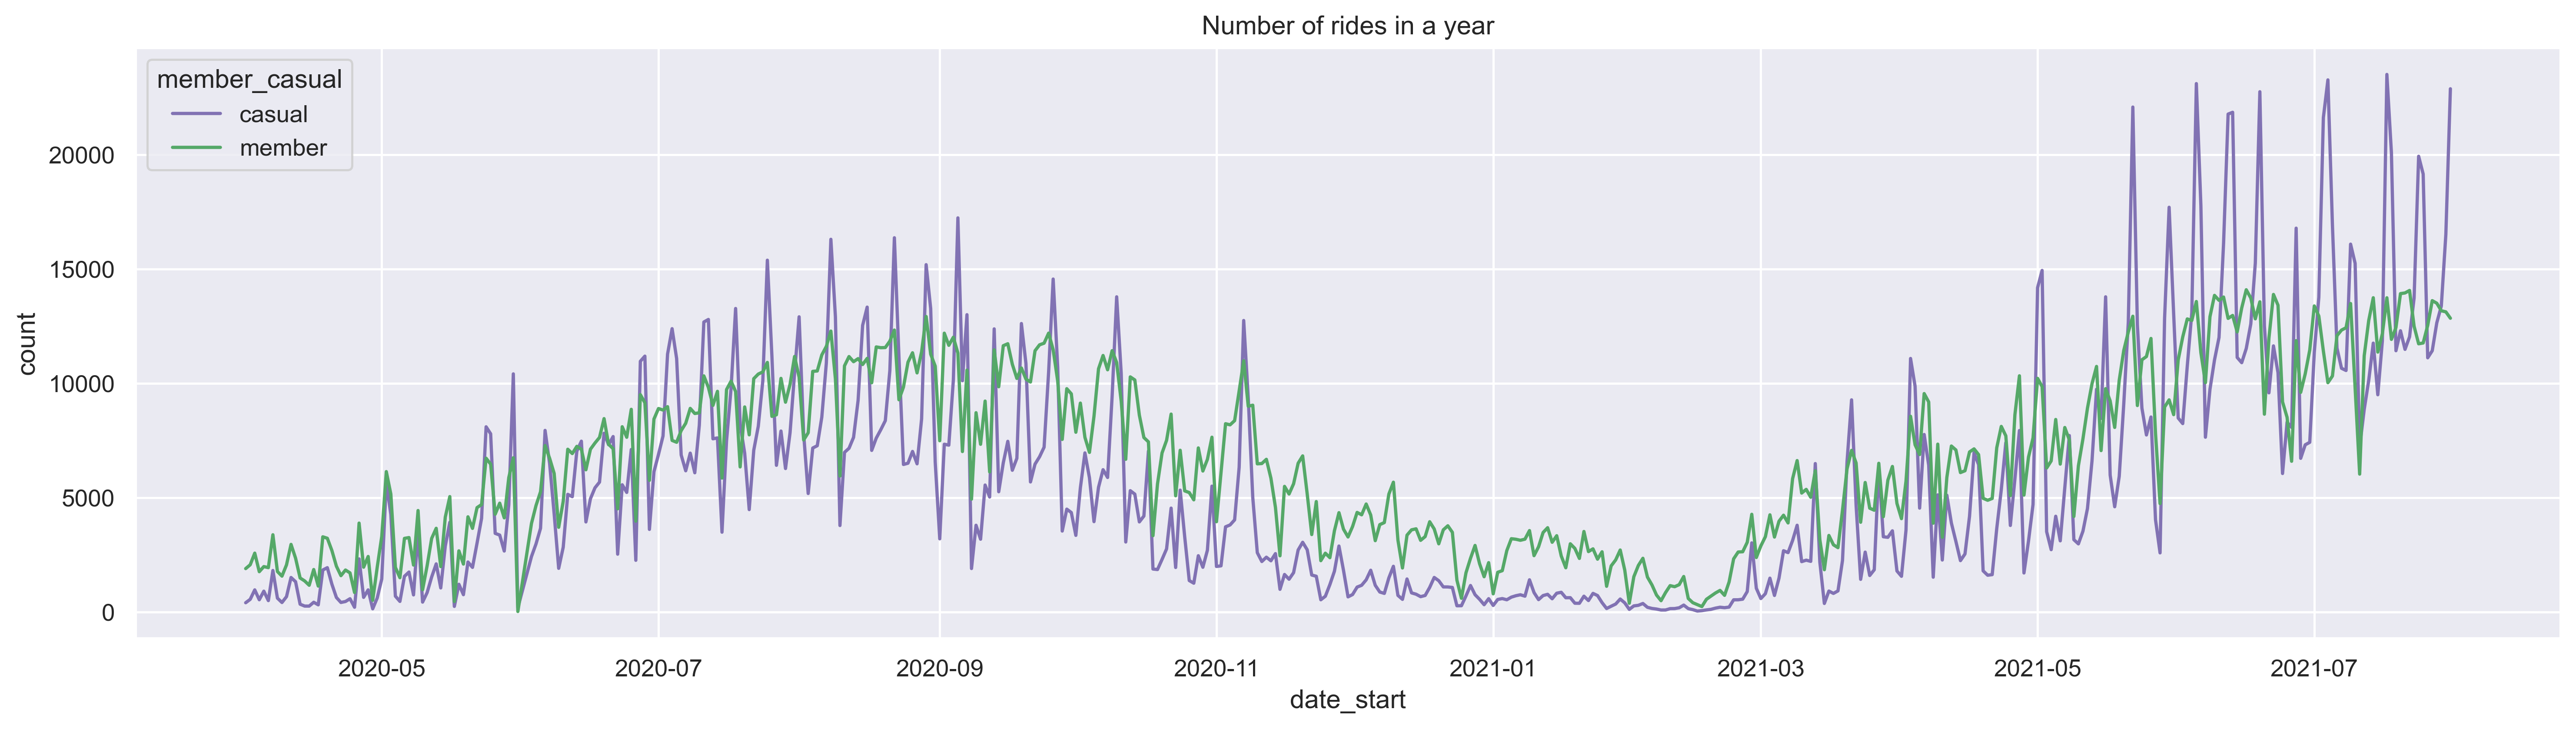

In [135]:
#Trends in number of rides during the year

#Create a table demonstrating the number of rides based on date_start and membership status ('member_casual')
df_trips_copy = df_trips.copy()
df_trips_copy['count'] = 1
lt_trend_1 = df_trips_copy.groupby(['date_start','member_casual'], as_index=False)['count'].sum()

#Graph
#In the graph, 'count' on y-axis indicates the number of rides

plt.figure(figsize=(20,5))
lt_plot_1 = sns.lineplot(x='date_start', y='count', hue='member_casual', palette = ['m', 'g'], data=lt_trend_1)
lt_plot_1.set(title = 'Number of rides in a year')

[Text(0.5, 1.0, 'Mean of ride length in a year')]

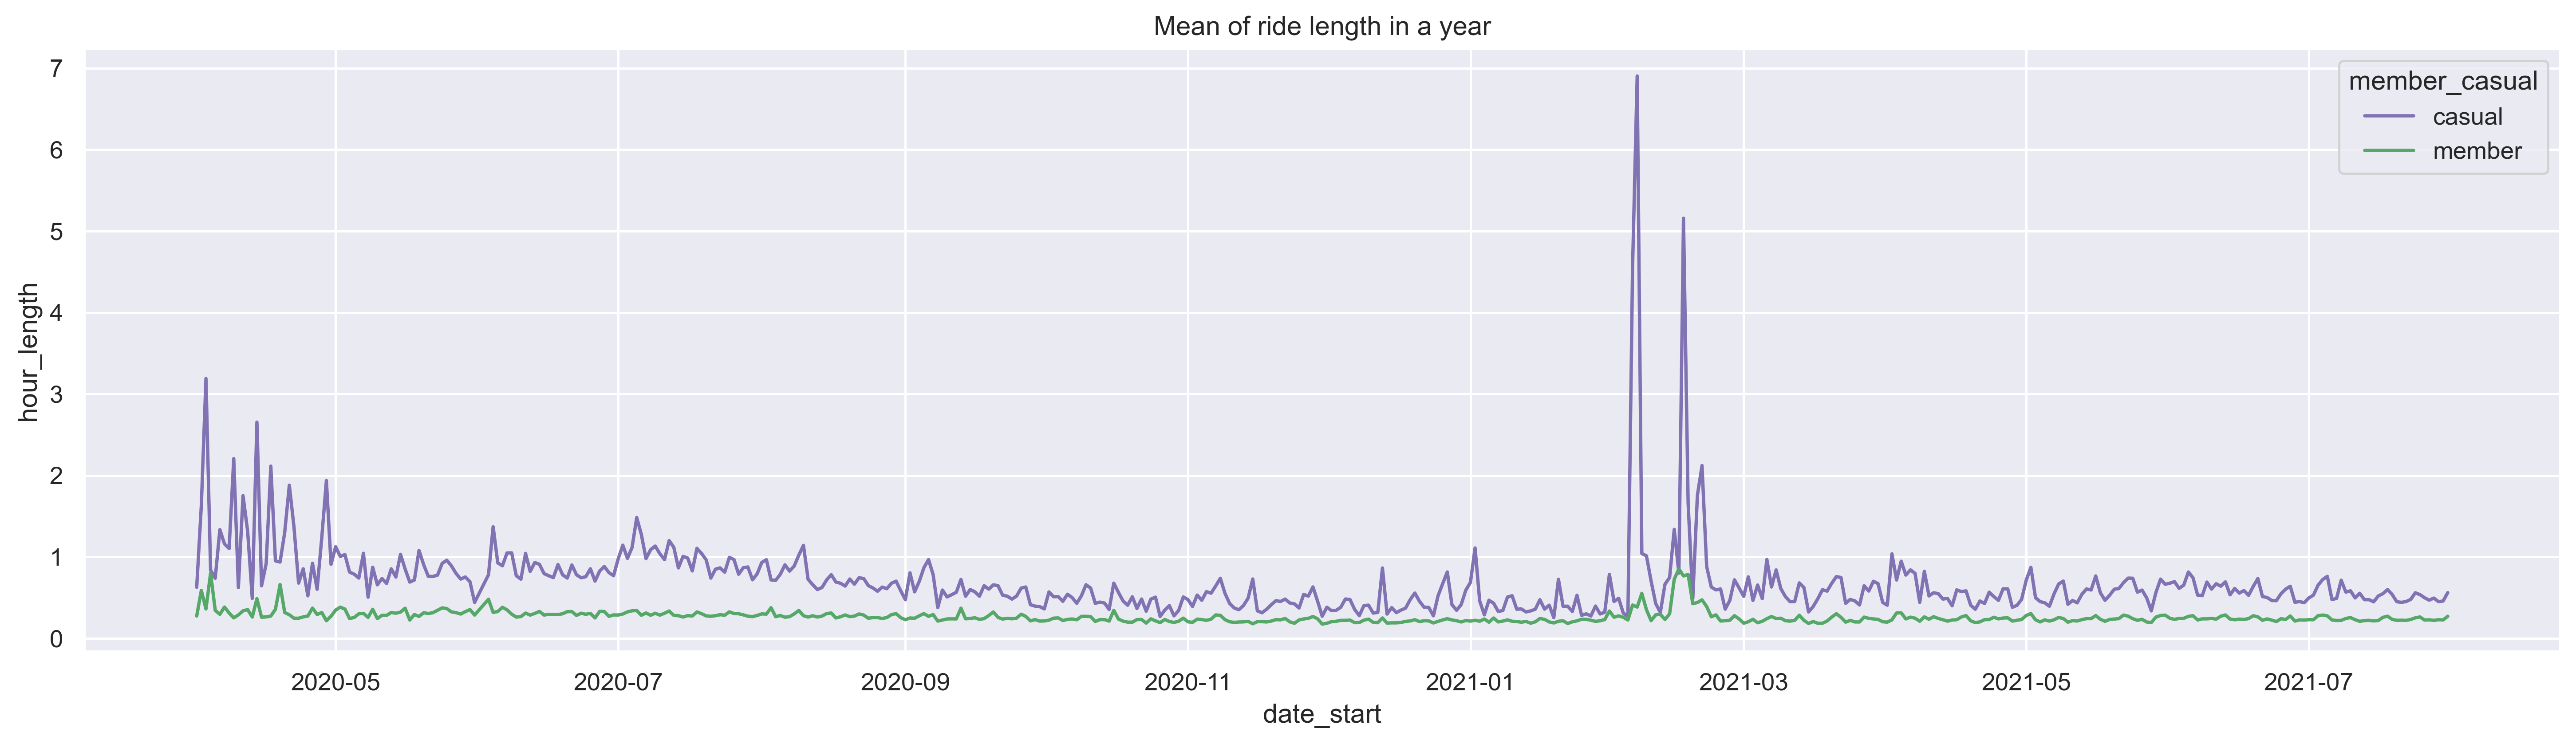

In [136]:
#Trends in number of ride length during the year

#Create a table demonstrating the number of rides based on date_start and membership status ('member_casual')

lt_trend_2 = df_trips_copy.groupby(['date_start','member_casual'], as_index=False)['hour_length'].mean()

#Graph
#In the graph, 'constant' on y-axis indicates the mean of trip length

plt.figure(figsize=(20,5))
lt_plot_2 = sns.lineplot(x='date_start', y='hour_length', hue='member_casual', palette = ['m', 'g'], data=lt_trend_2)
lt_plot_2.set(title = 'Mean of ride length in a year')

Pattern:
- Ride counts tend to increase during the warm period of the year for both casual and member category.
- The deviation of ride counts in member riders is fairly smaller than that in casual riders.
- On average, the duration of casual ride is longer that of member ride.

Now we investigate how trip length varies across dates of the week and rider types

#### Riding behavior patterns of riders

<ipython-input-137-de65f6594f6a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trips['day_of_week'] = pd.Categorical(df_trips['day_of_week'], categories=['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], ordered=True)


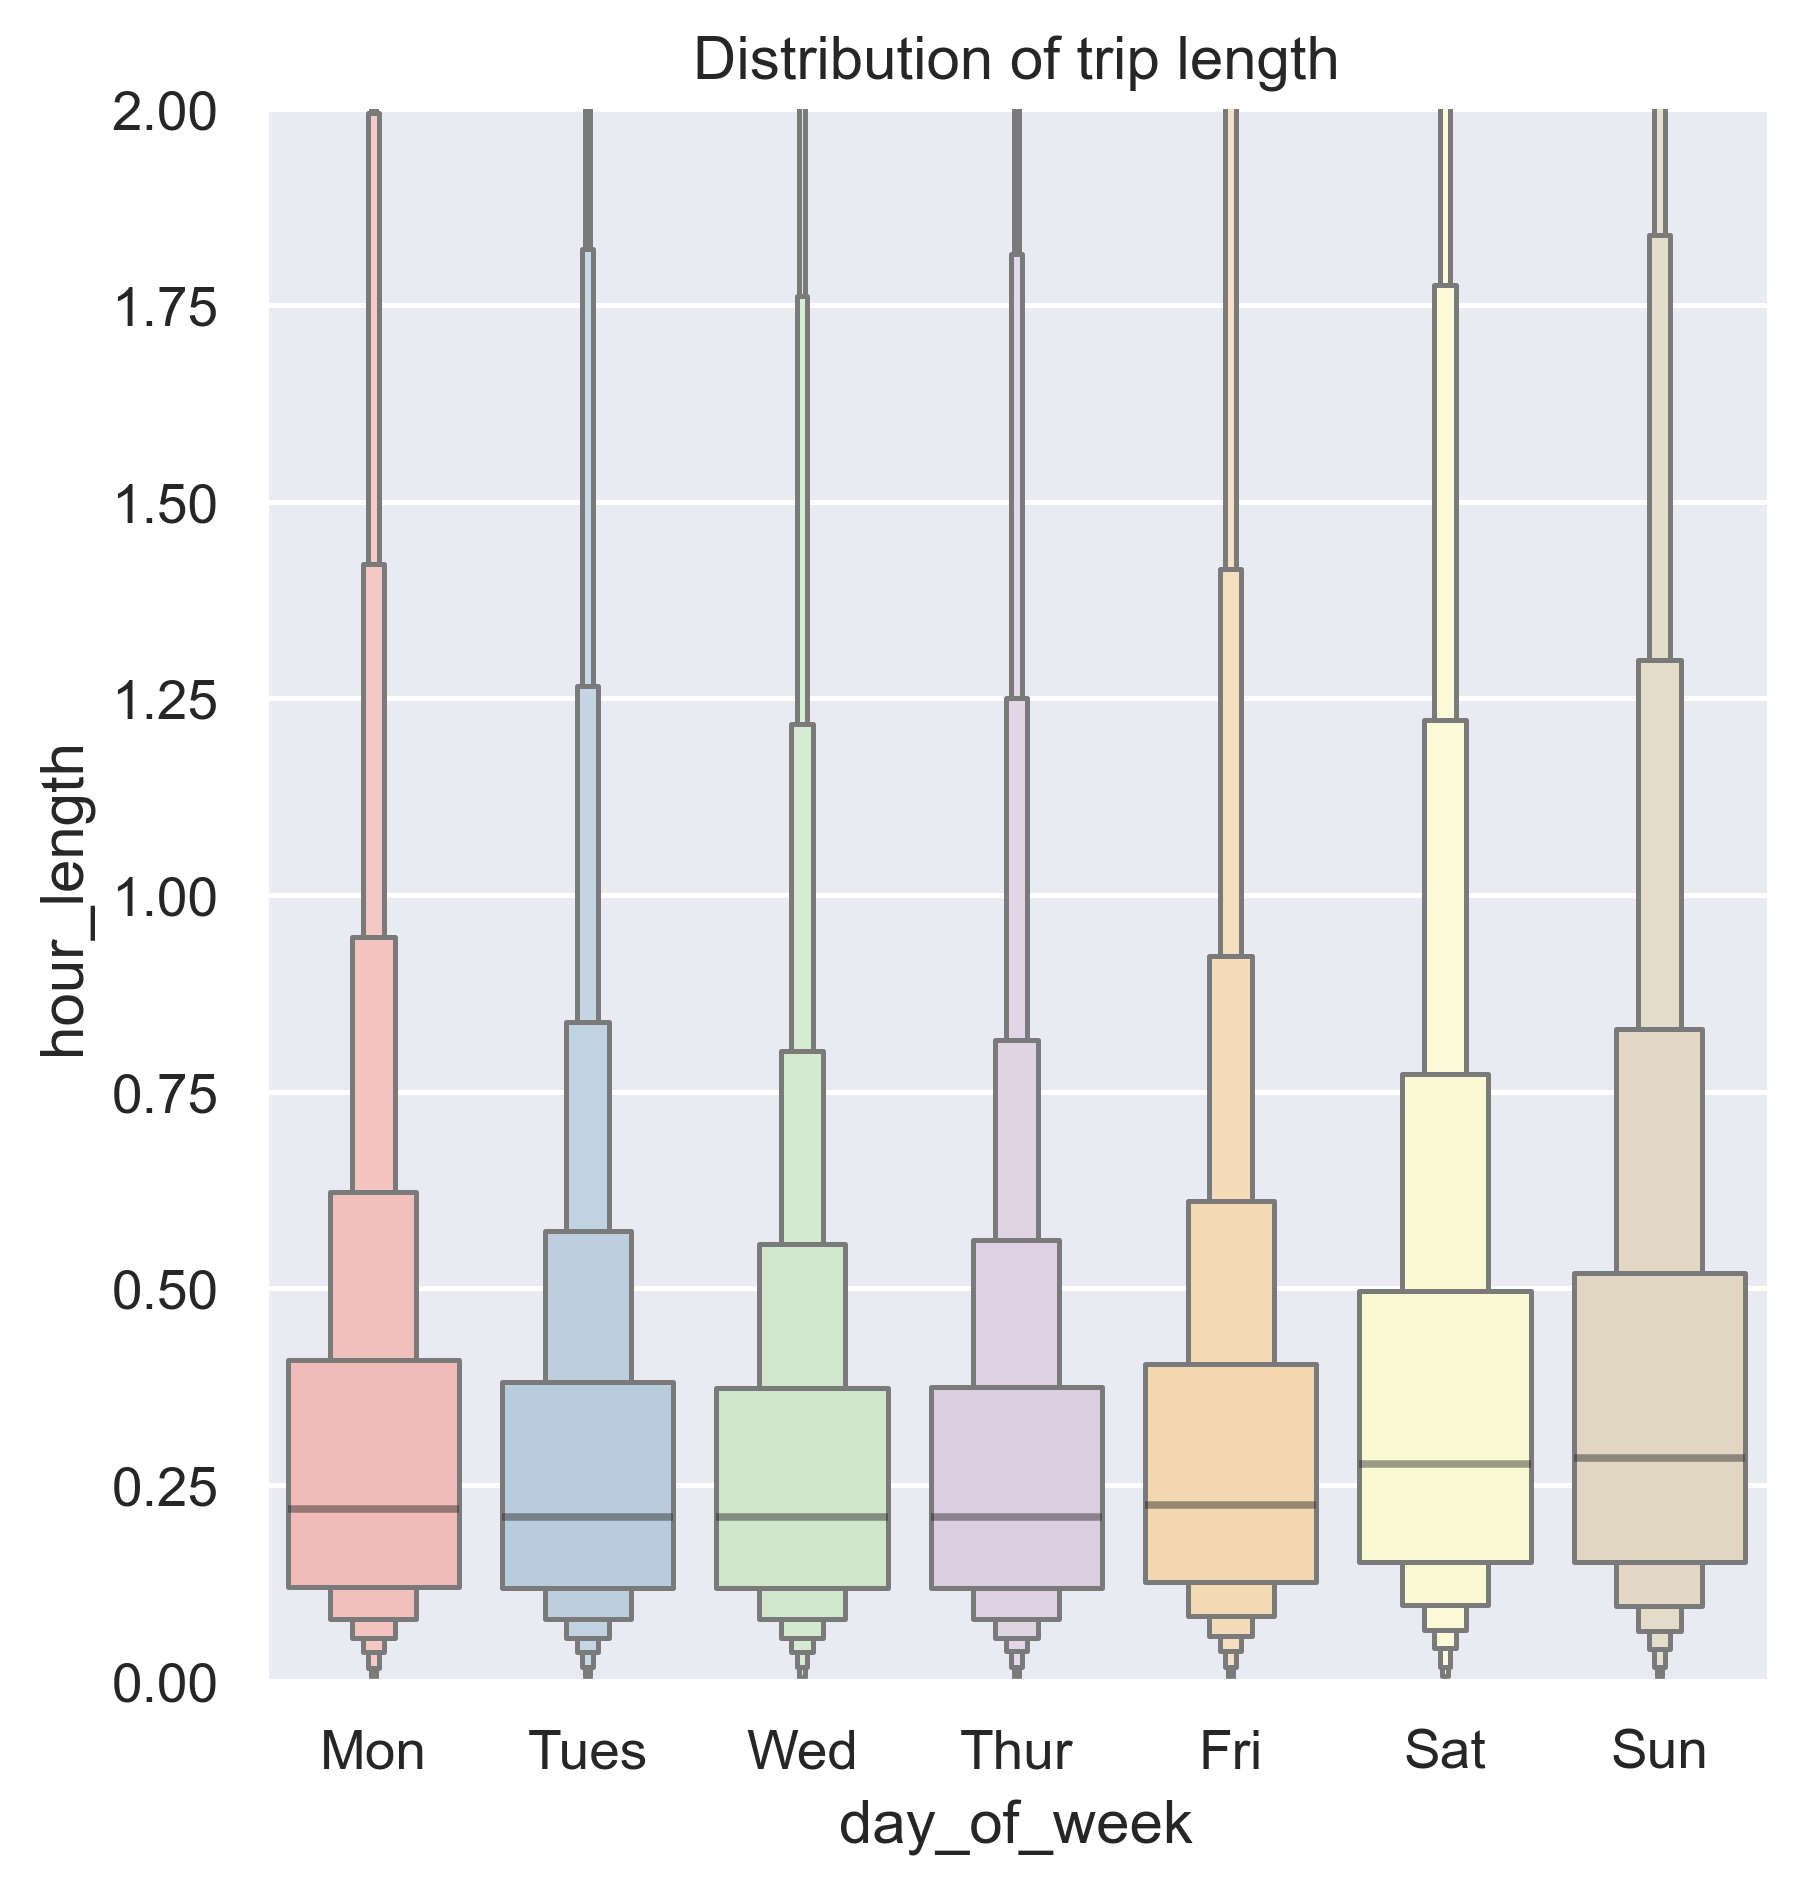

In [137]:
#Distribution of trip length (hour_length) of the whole sample

#Set the order of categorical variables
df_trips['day_of_week'] = pd.Categorical(df_trips['day_of_week'], categories=['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], ordered=True)

#Graph
sum_plot = sns.catplot(x = 'day_of_week', y = 'hour_length', kind = 'boxen', palette = 'Pastel1', data = df_trips)
sum_plot.set(ylim=(0, 2))
sum_plot.set(title = 'Distribution of trip length')

<ipython-input-138-d023f5a30a2f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_member['day_of_week'] = pd.Categorical(df_member['day_of_week'], categories=['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], ordered=True)


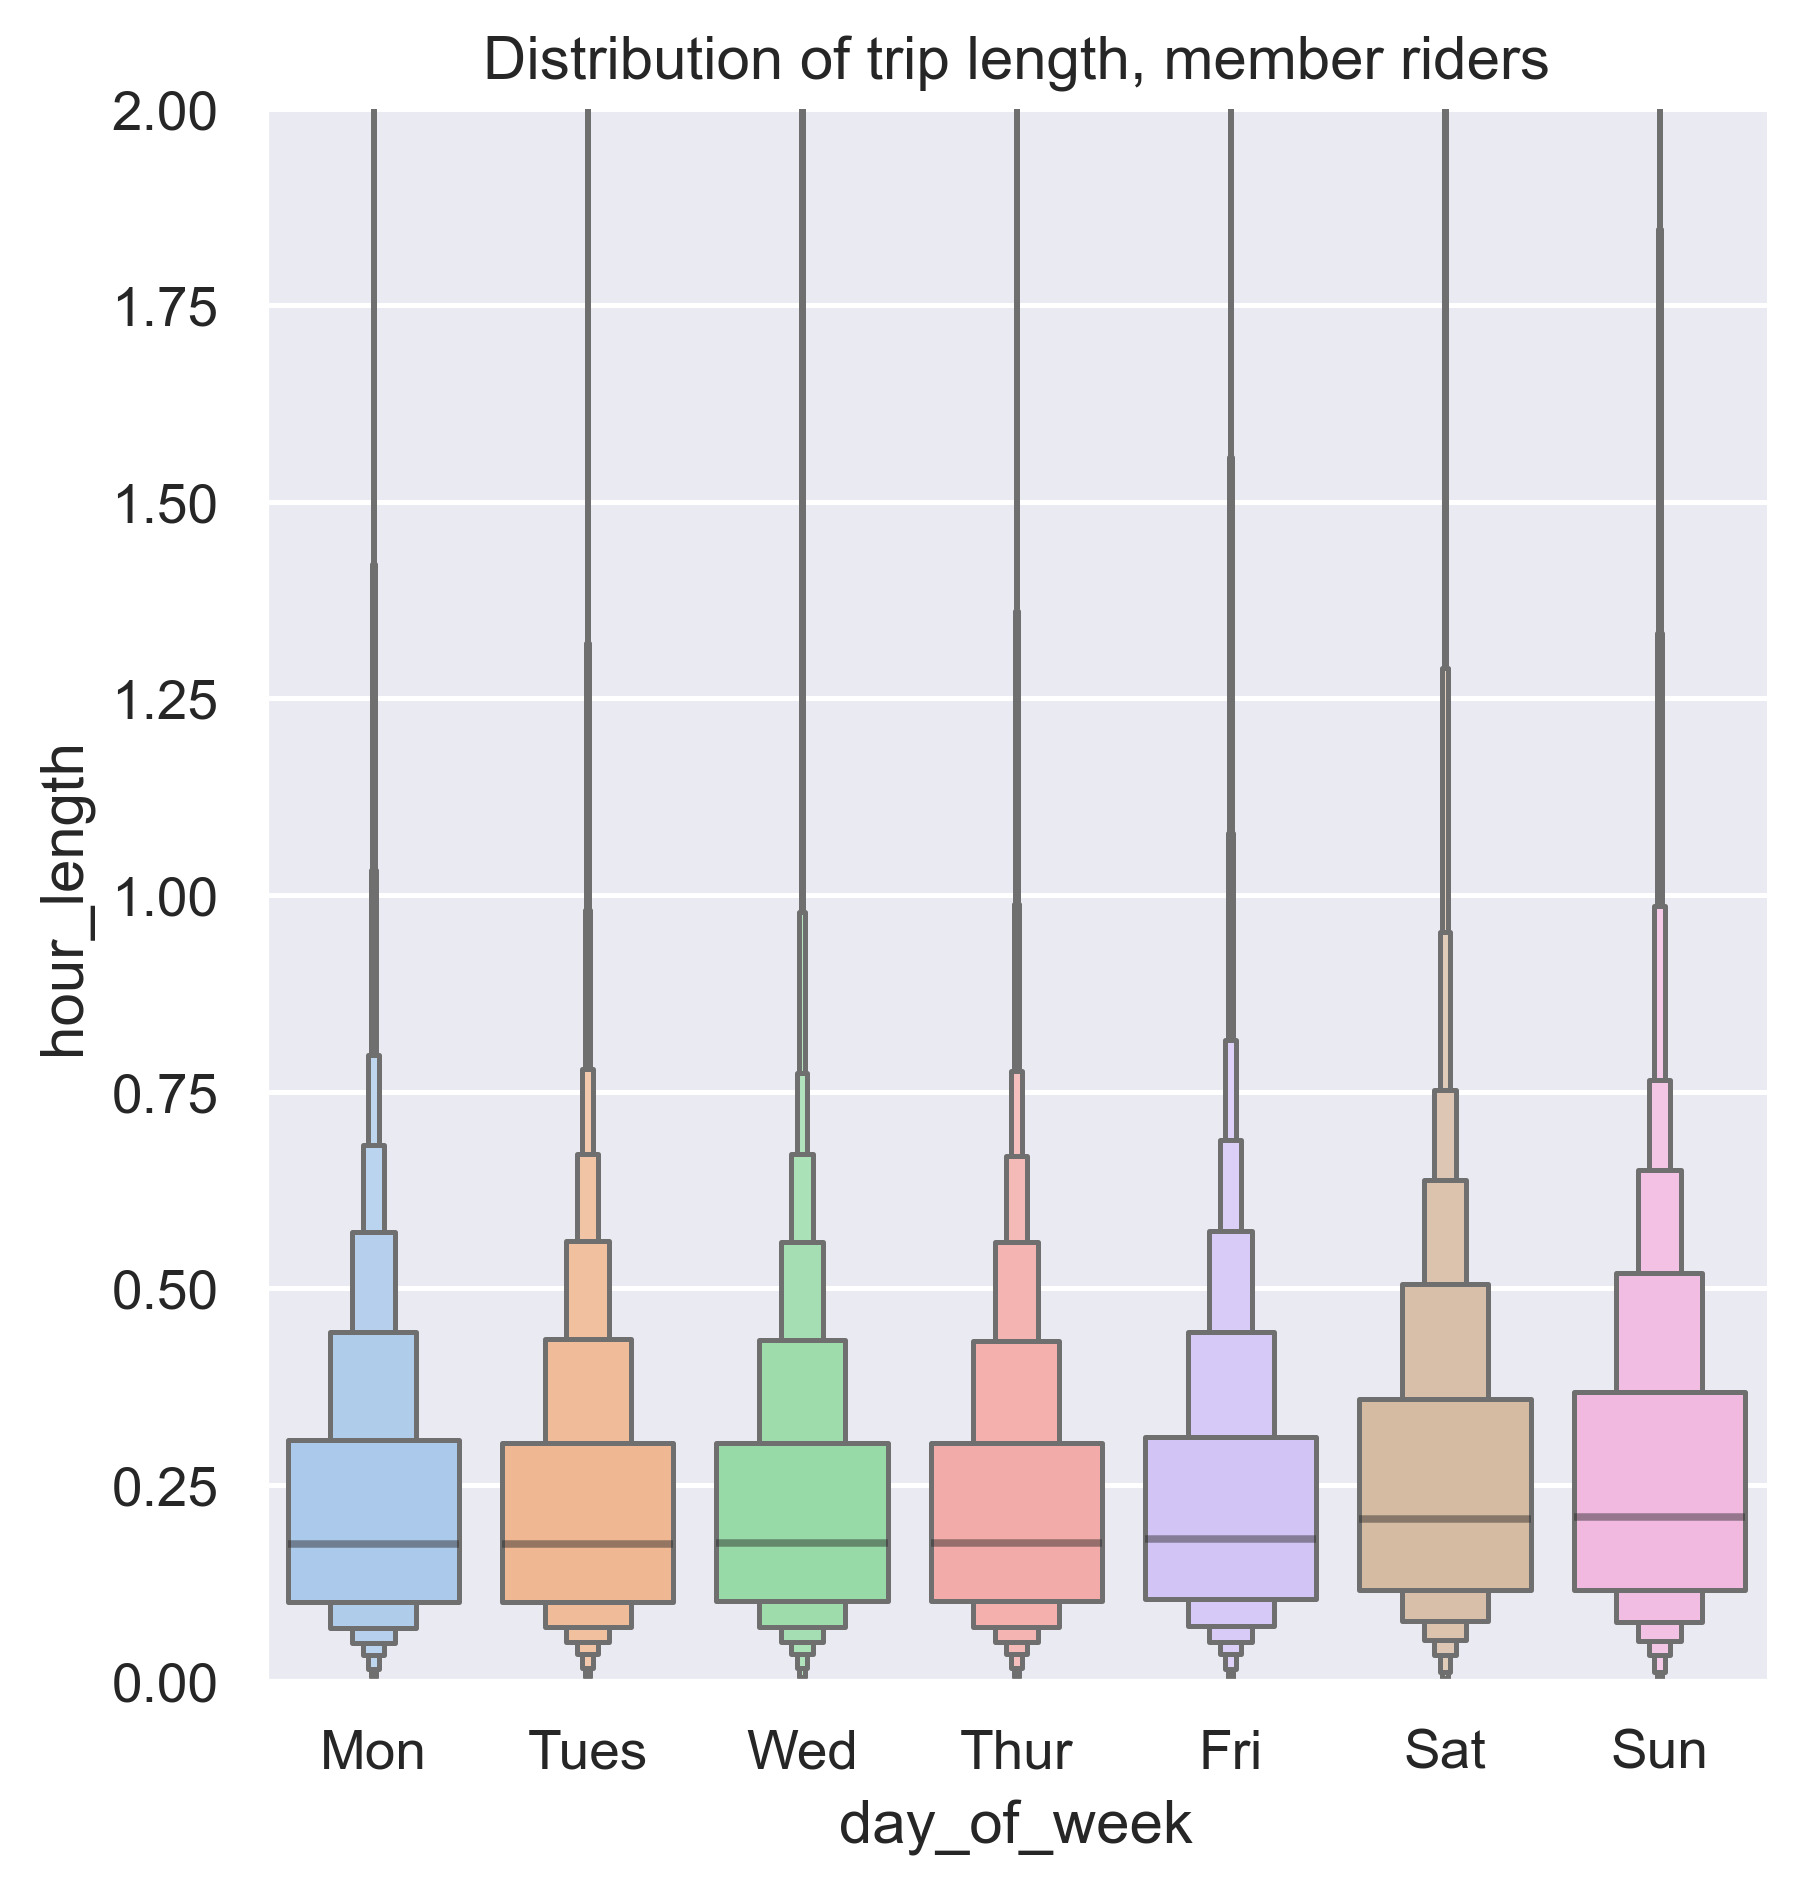

In [138]:
#Distribution of trip length (hour_length) of riders with membership only

#Extract 'member' type only to generate a plot
df_member = df_trips[df_trips['member_casual']=='member']

#Order of categorical values
df_member['day_of_week'] = pd.Categorical(df_member['day_of_week'], categories=['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], ordered=True)

#Graph
member_plot = sns.catplot(x = 'day_of_week', y = 'hour_length', kind = 'boxen', palette = 'pastel', data = df_member)
member_plot.set(ylim=(0, 2))
member_plot.set(title = 'Distribution of trip length, member riders')

<ipython-input-139-d3c0fbffede3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_casual['day_of_week'] = pd.Categorical(df_casual['day_of_week'], categories=['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], ordered=True)


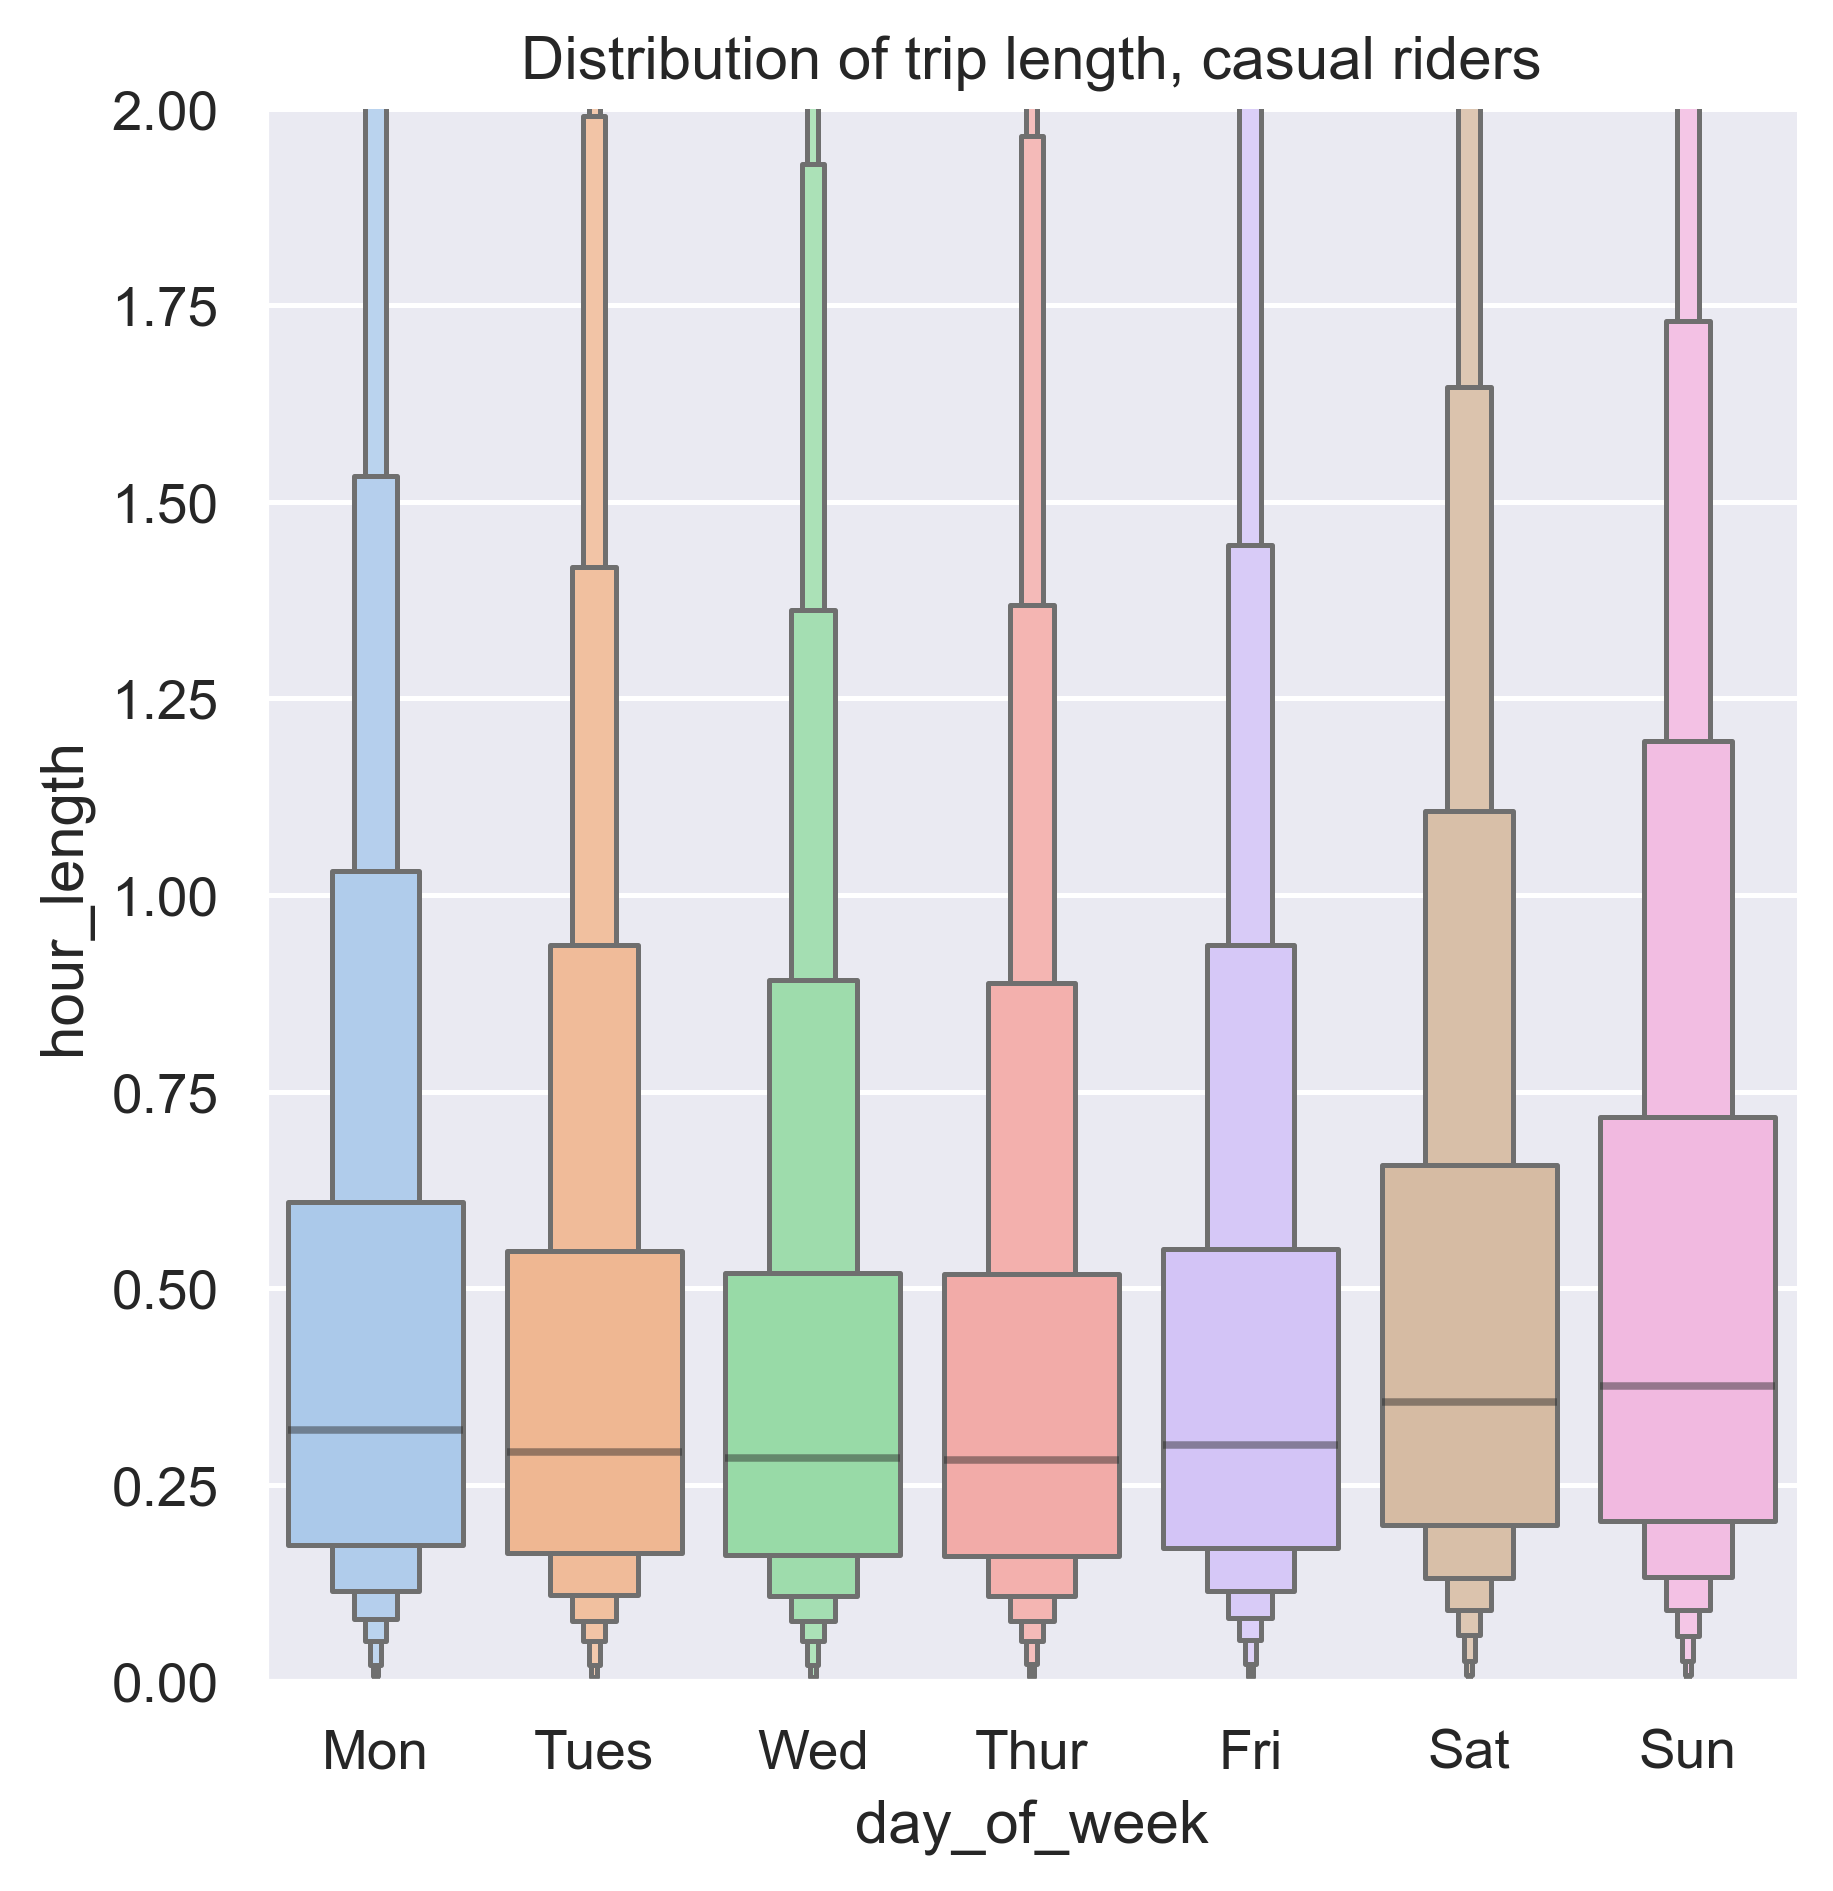

In [139]:
#Distribution of trip length (hour_length) of casual riders

#Extract 'casual' type only to generate a plot
df_casual = df_trips[df_trips['member_casual']=='casual']

#Order of categorical values
df_casual['day_of_week'] = pd.Categorical(df_casual['day_of_week'], categories=['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], ordered=True)

#Graph
casual_plot = sns.catplot(x = 'day_of_week', y = 'hour_length', kind = 'boxen', palette = 'pastel', data = df_casual)
casual_plot.set(ylim=(0, 2))
casual_plot.set(title = 'Distribution of trip length, casual riders')

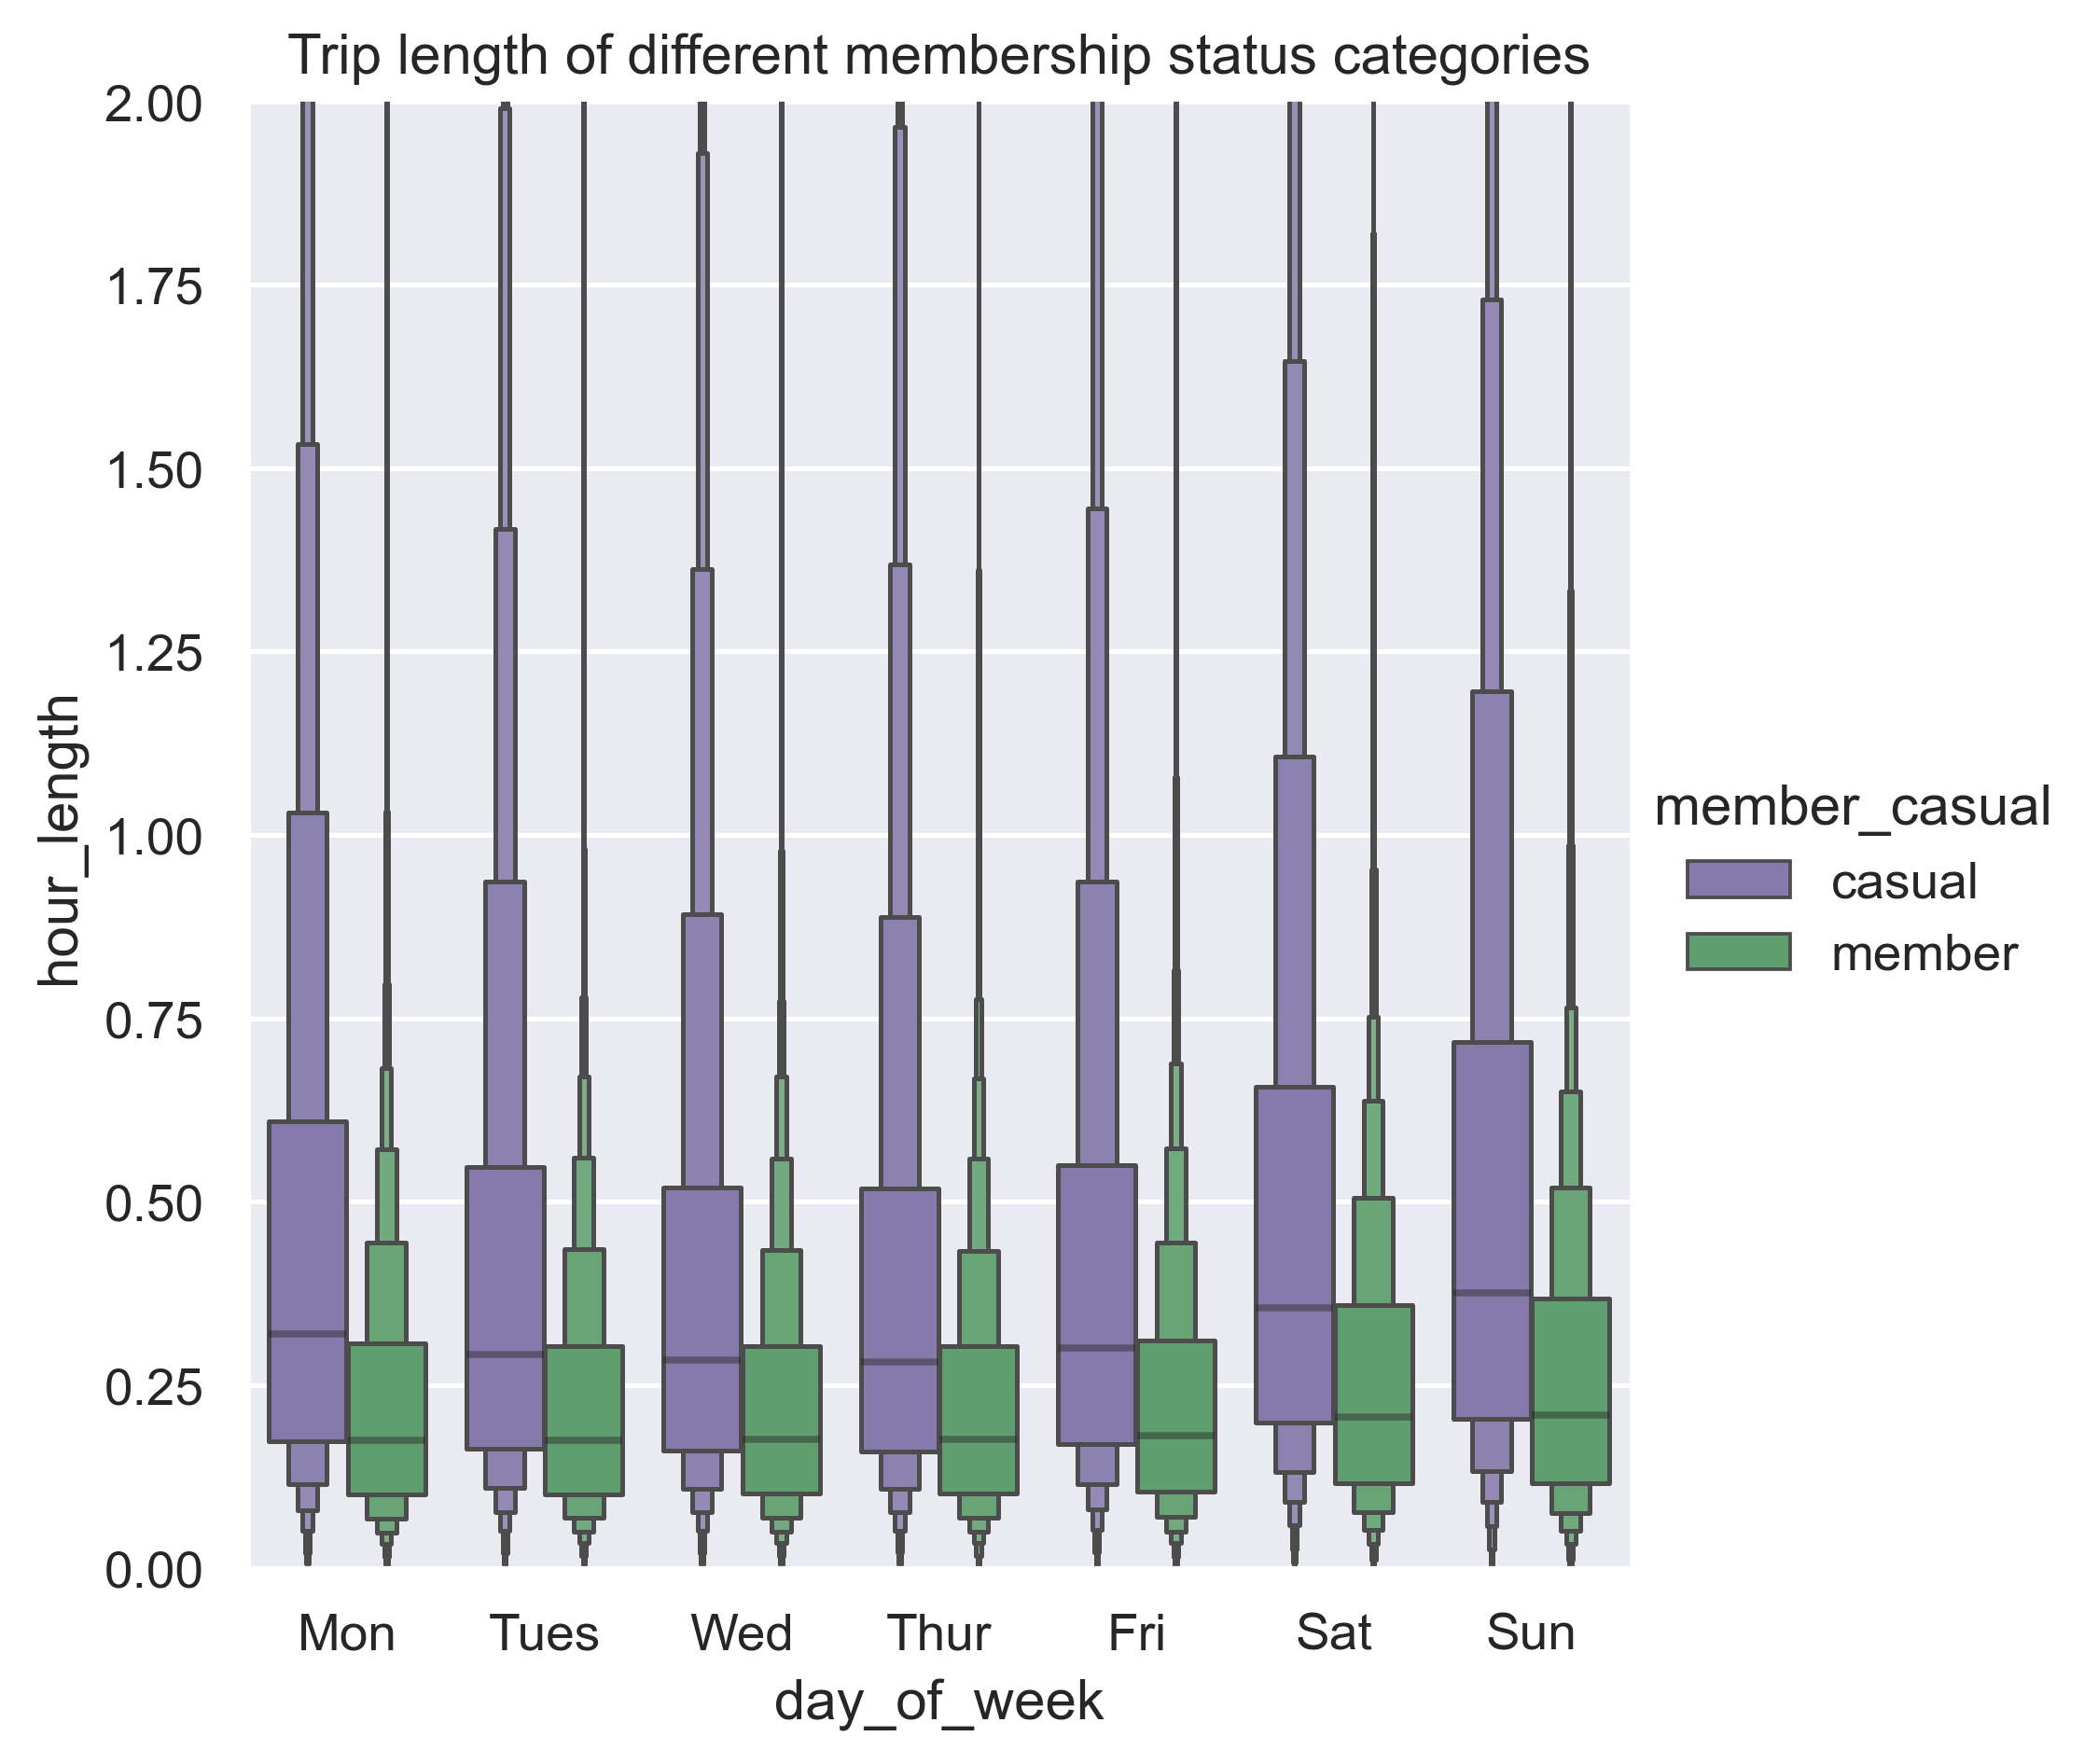

In [140]:
comp_plot1 = sns.catplot(x='day_of_week', y='hour_length', kind = 'boxen', hue='member_casual', palette=['m', 'g'], data=df_trips)
comp_plot1.set(ylim=(0, 2))
comp_plot1.set(title = 'Trip length of different membership status categories')

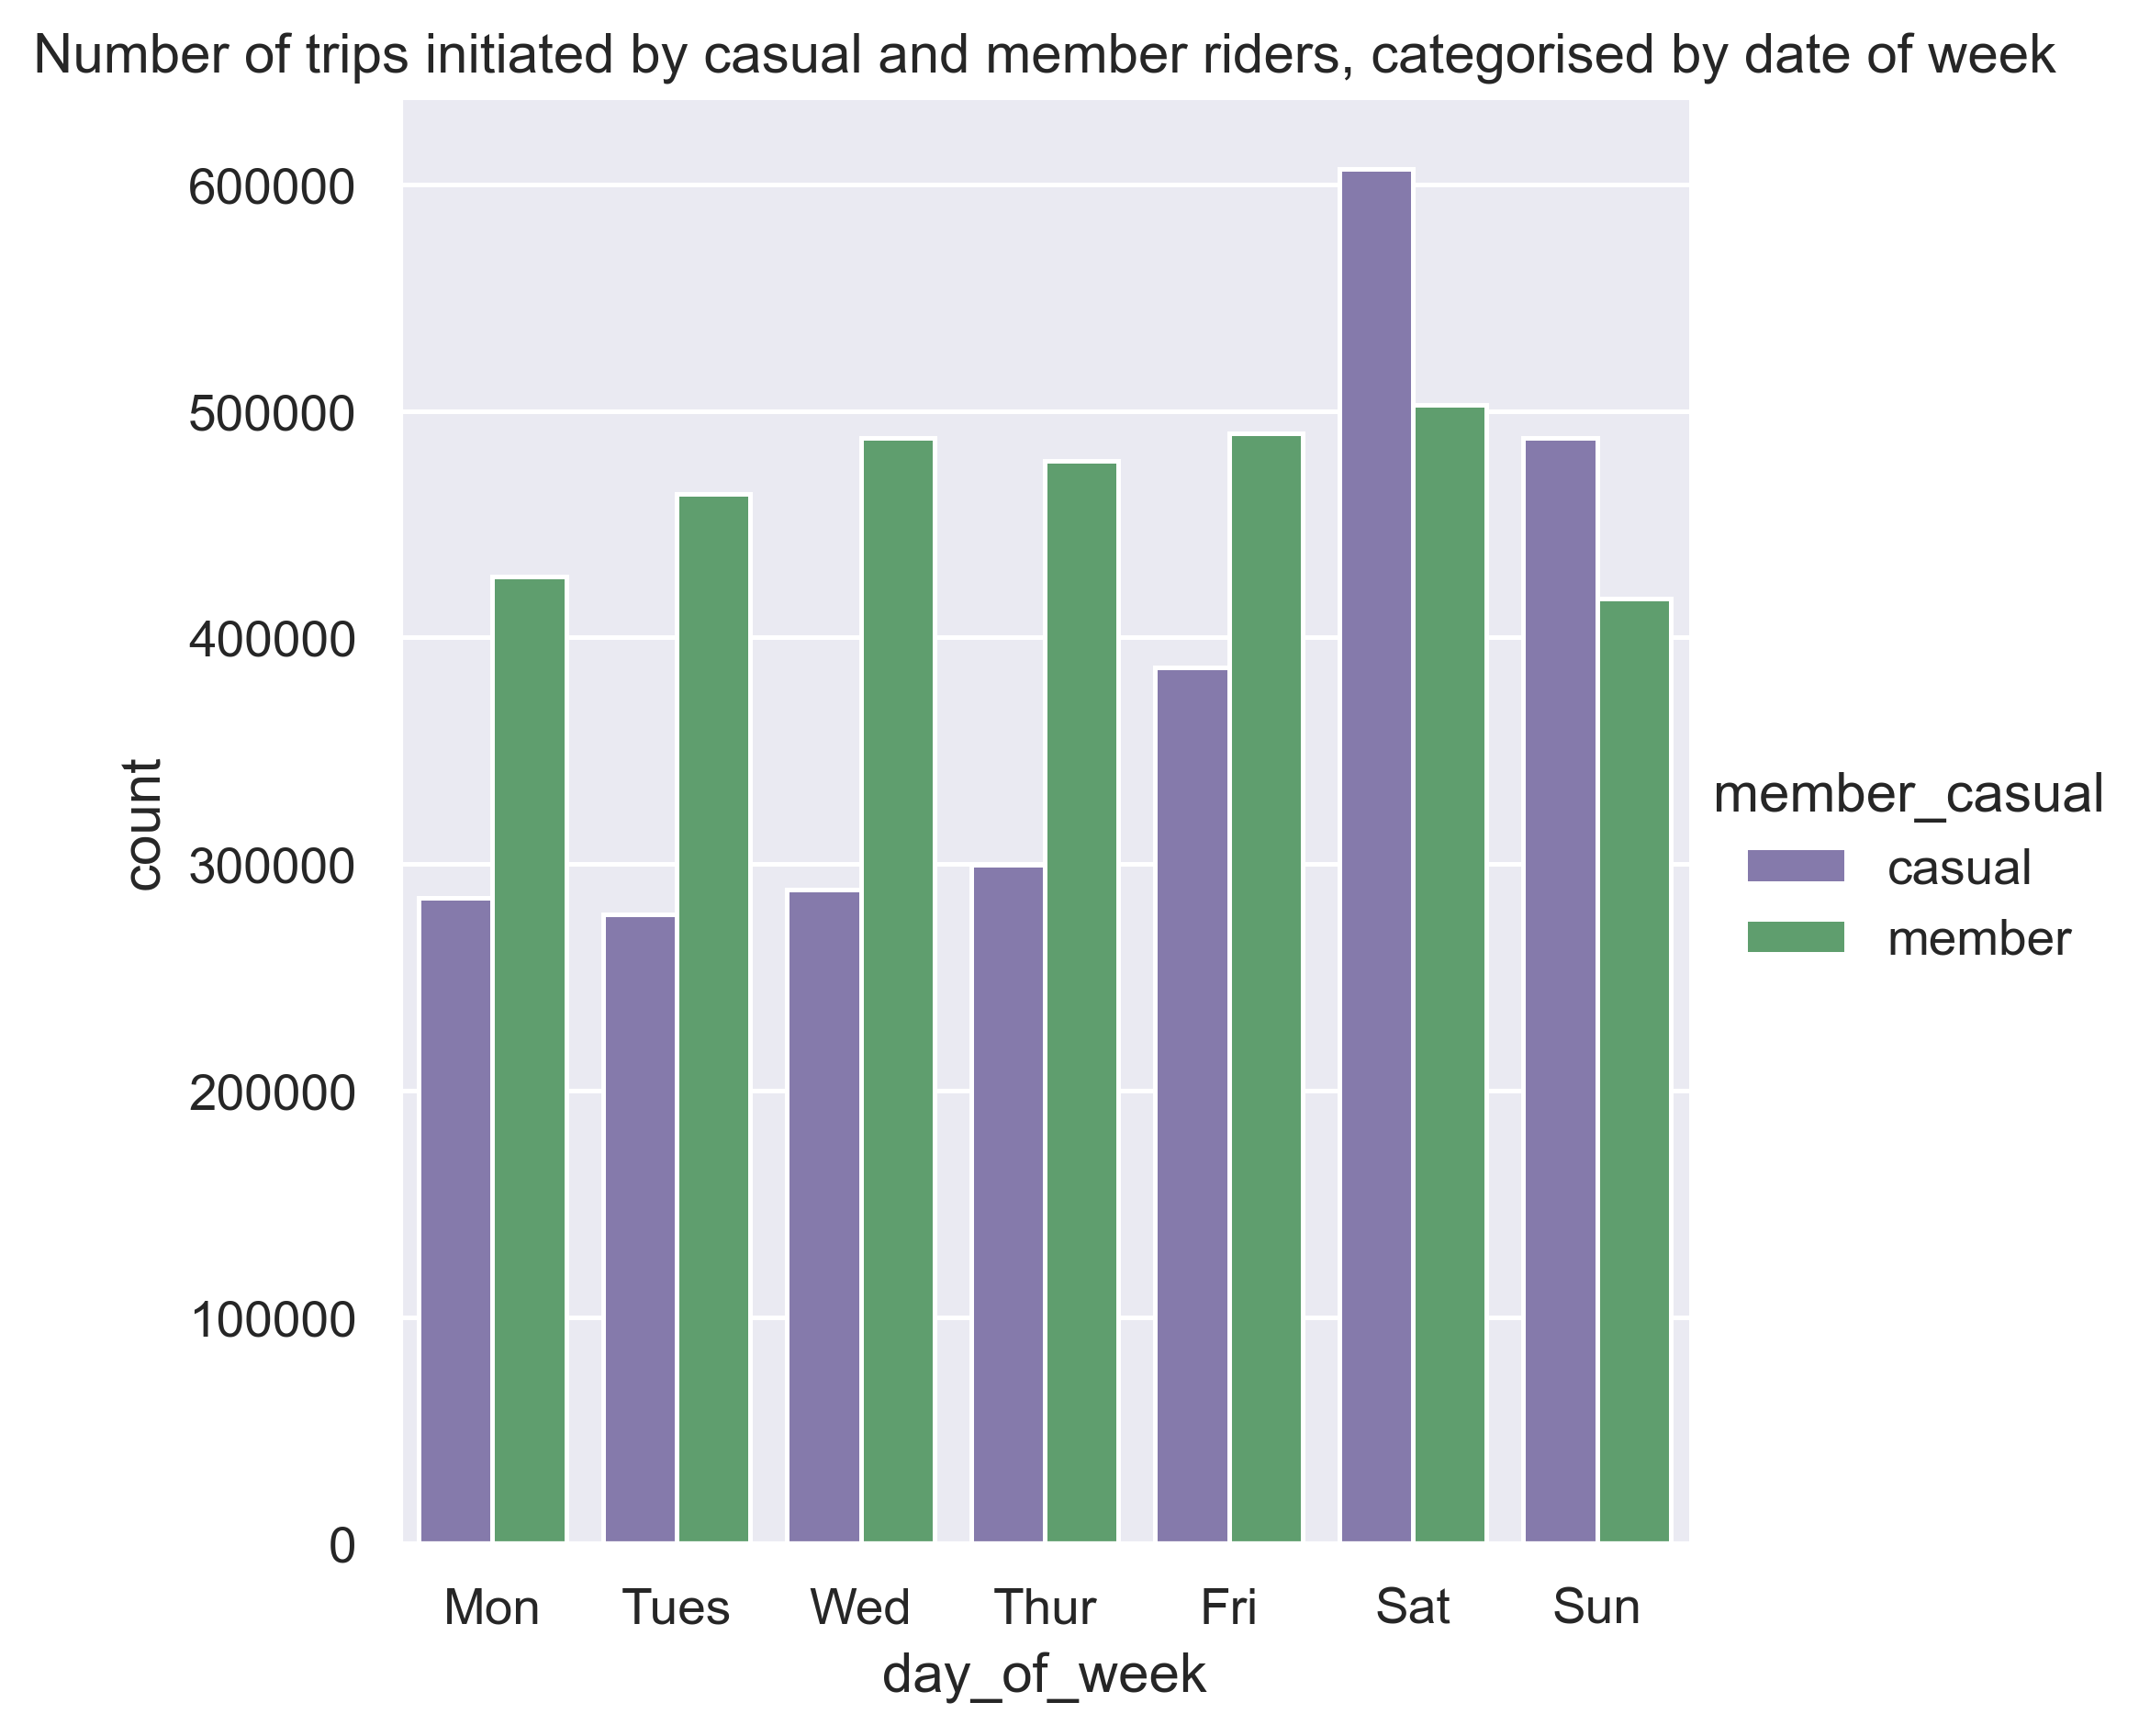

In [141]:
comp_plot2 = sns.catplot(x = 'day_of_week', kind = 'count', hue = 'member_casual', palette = ['m', 'g'], data=df_trips)
comp_plot2.set(title = 'Number of trips initiated by casual and member riders, categorised by date of week')

Patterns:
- In casual rider groups, the ride length is longer on weekends than on weekdays.
- Less dispersion is observed on member group than on casual group. 
- Casual riders tend to borrow bikes when they estimate the trip to be longer than usual. 
- Member riders tend to have a stable ride length during the week.

#### Preference in rideable bikes

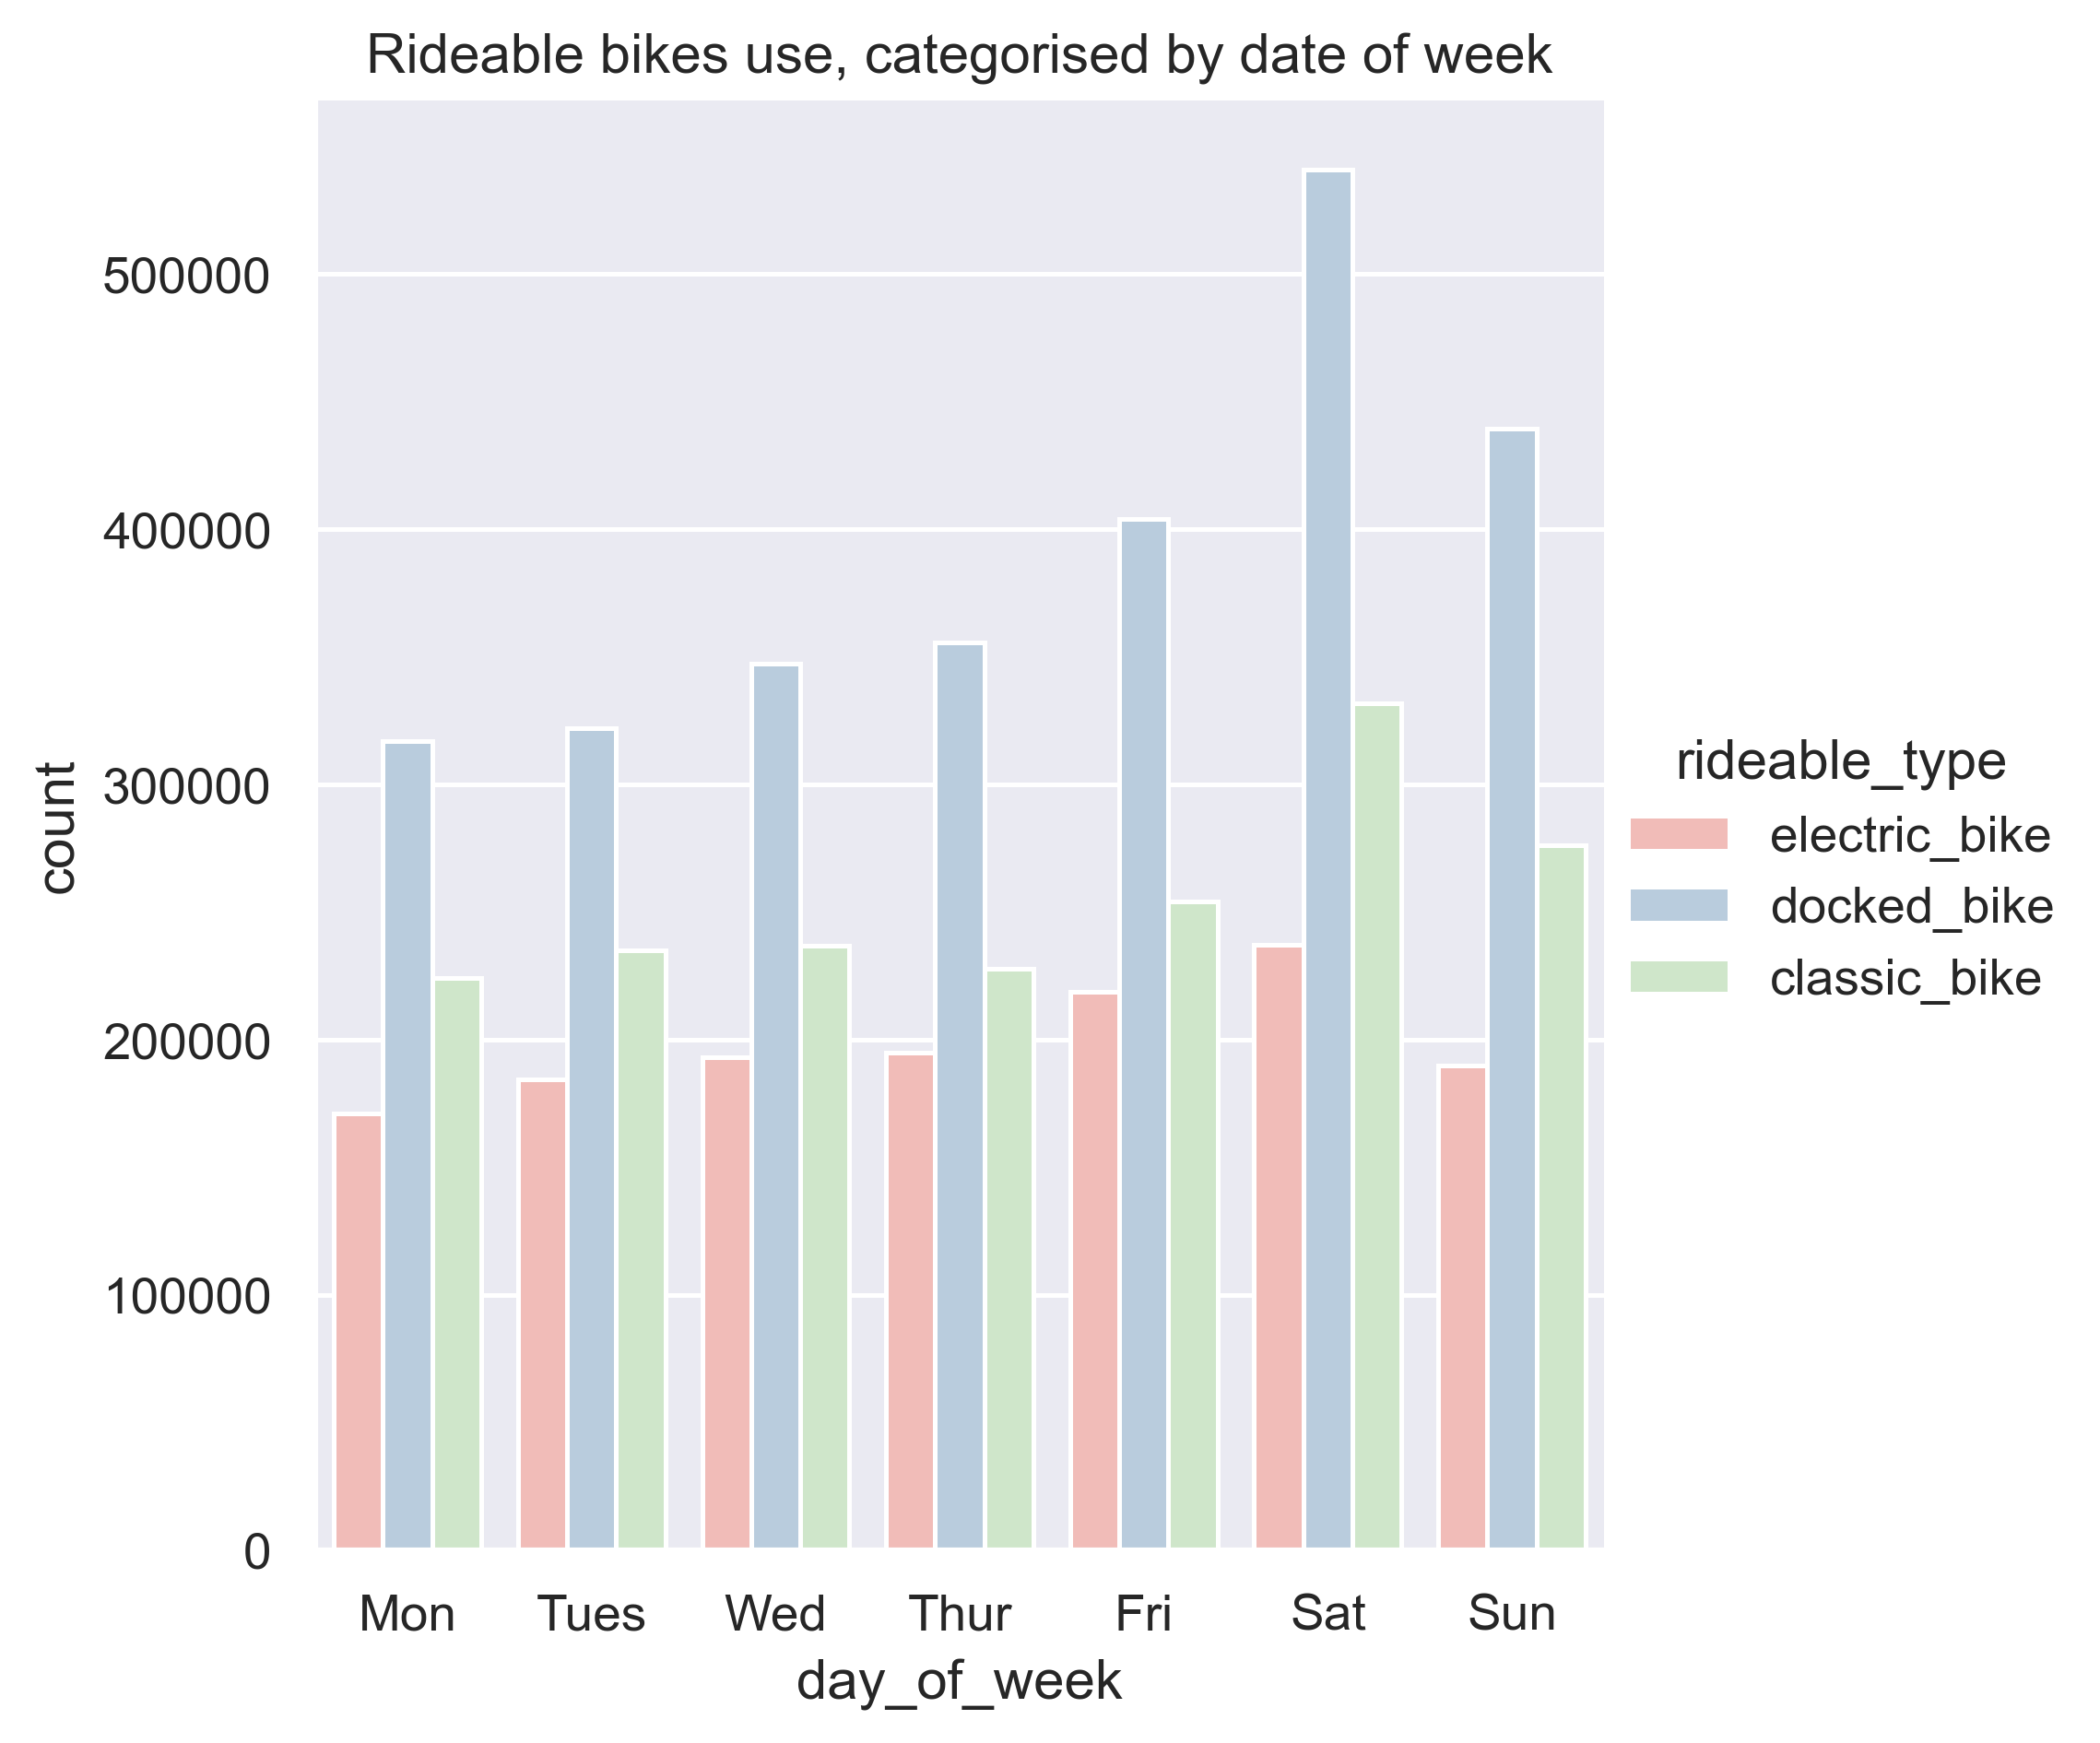

In [142]:
comp_plot3 = sns.catplot(x = 'day_of_week', kind = 'count', hue = 'rideable_type', palette = 'Pastel1', data=df_trips)
comp_plot3.set(title = 'Rideable bikes use, categorised by date of week')

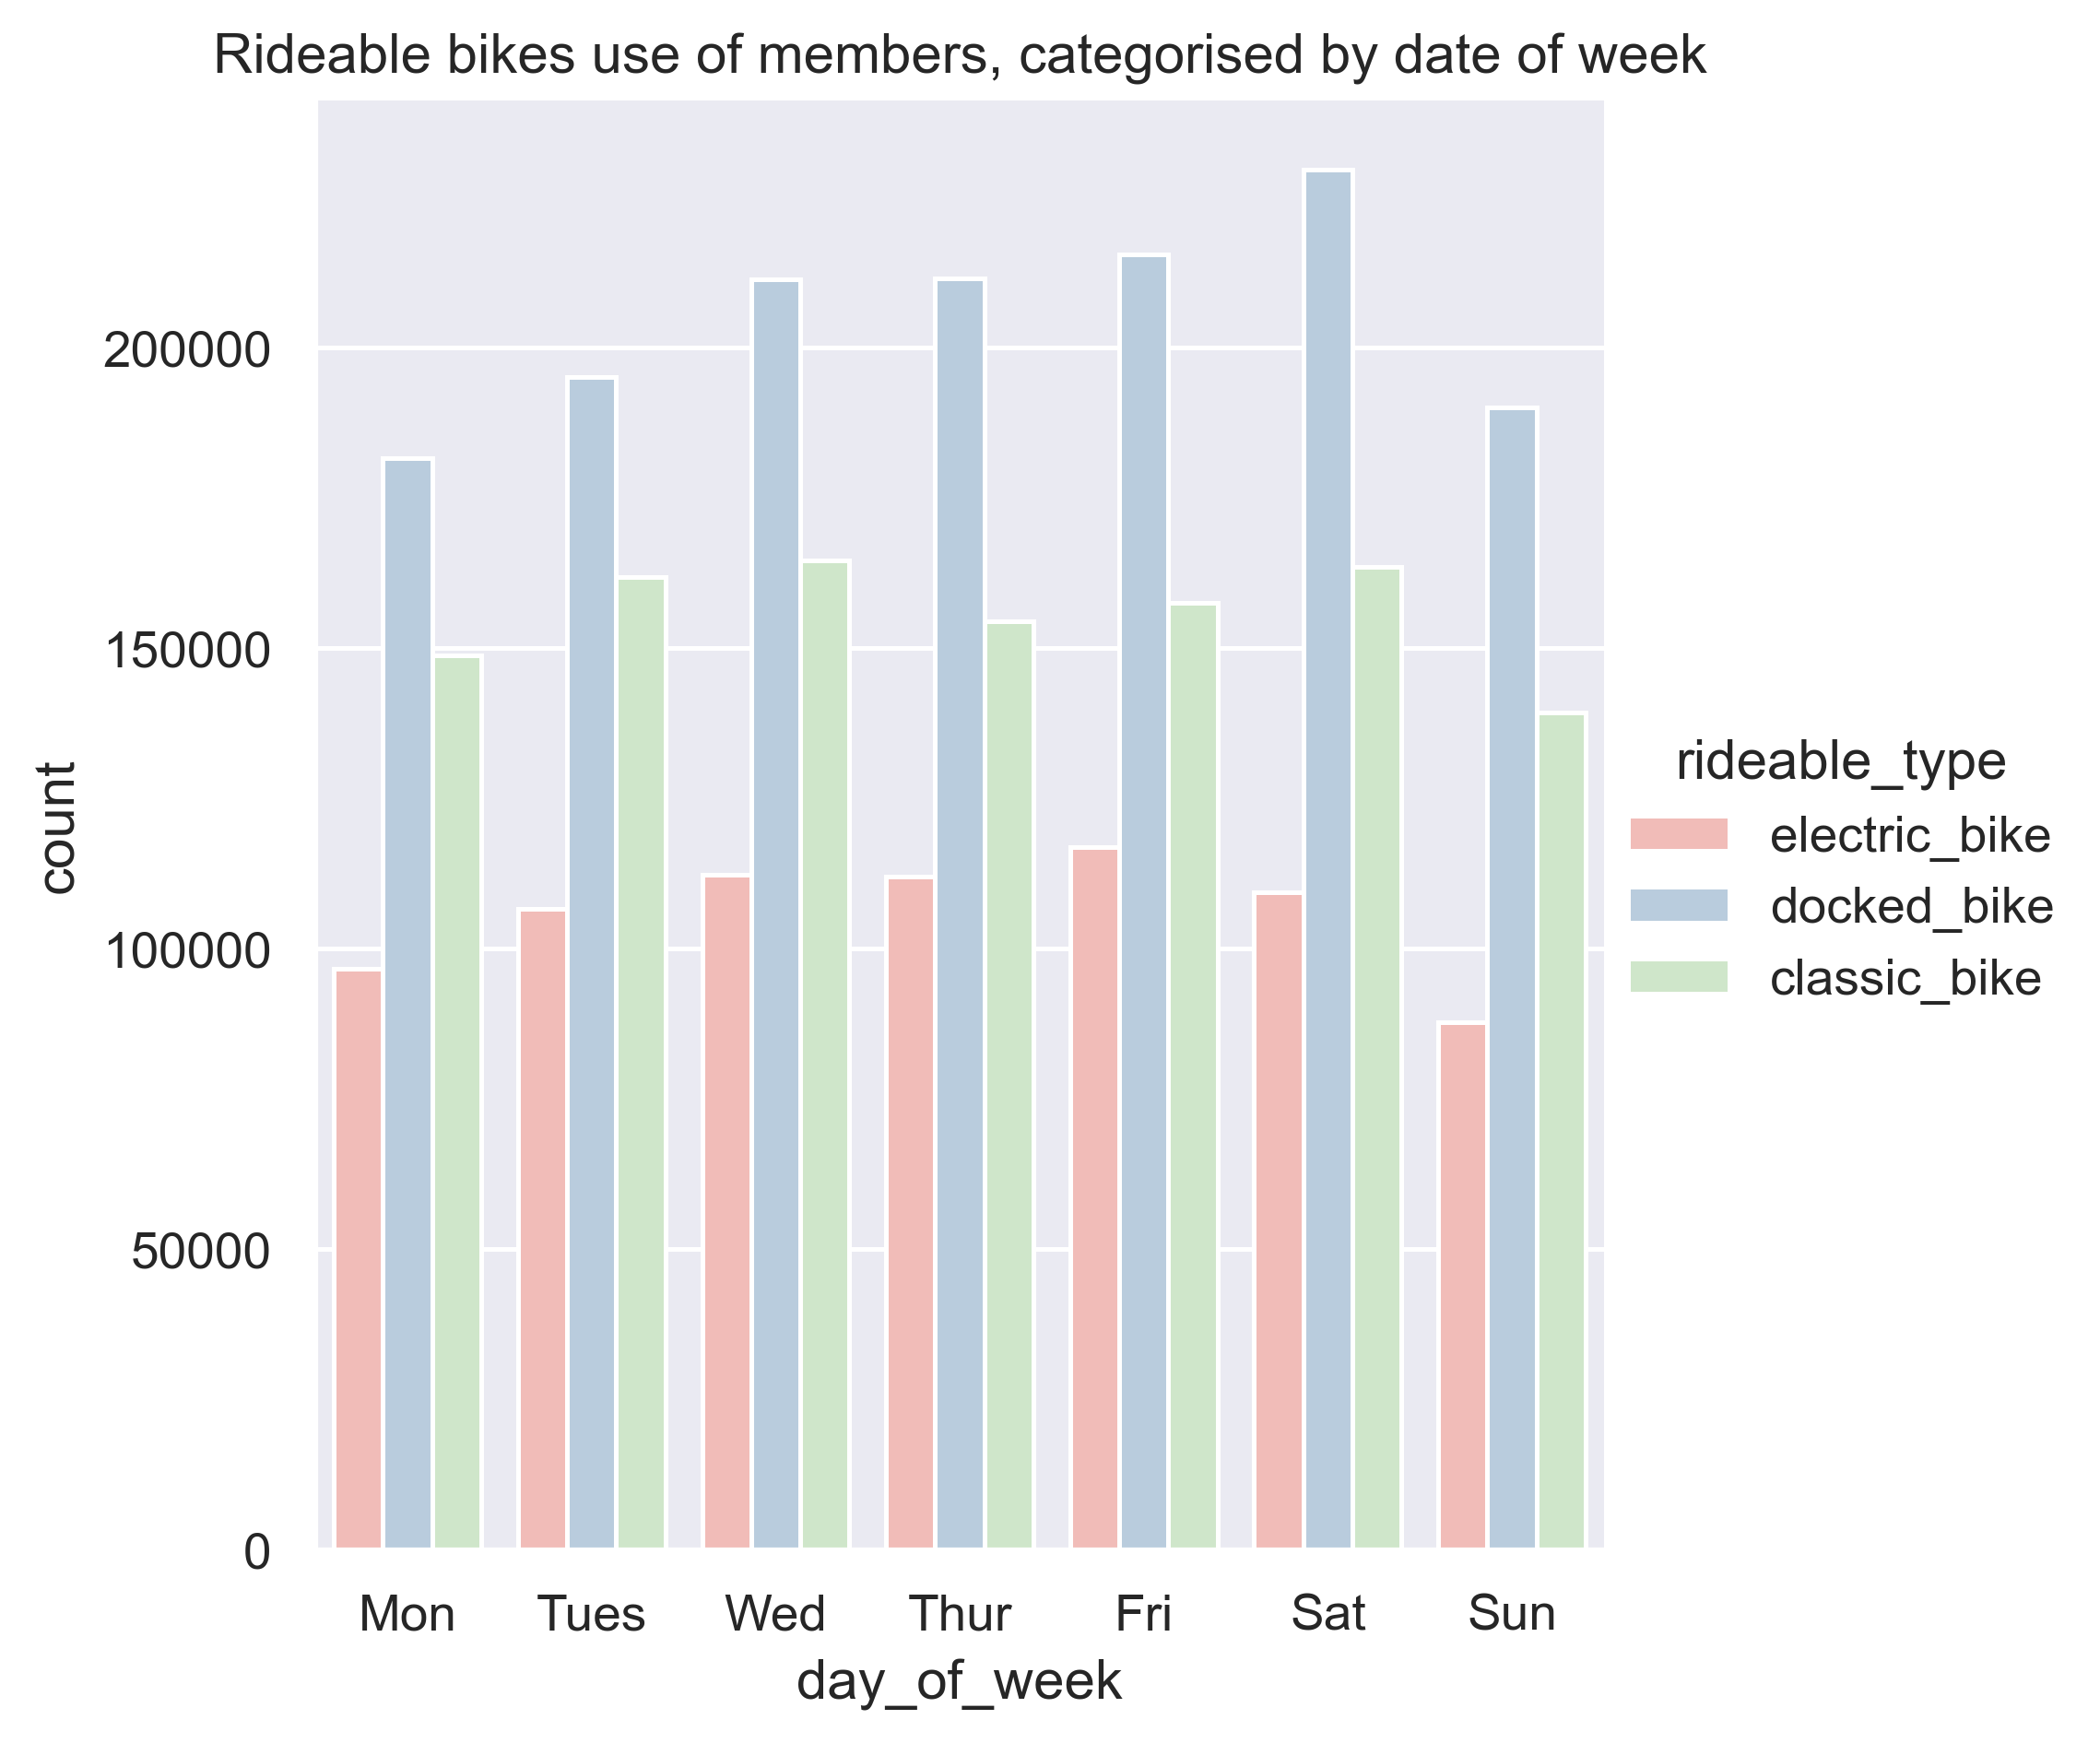

In [143]:
rideable_mem = sns.catplot(x = 'day_of_week', kind = 'count', hue = 'rideable_type', palette = 'Pastel1', data=df_member)
rideable_mem.set(title = 'Rideable bikes use of members, categorised by date of week')

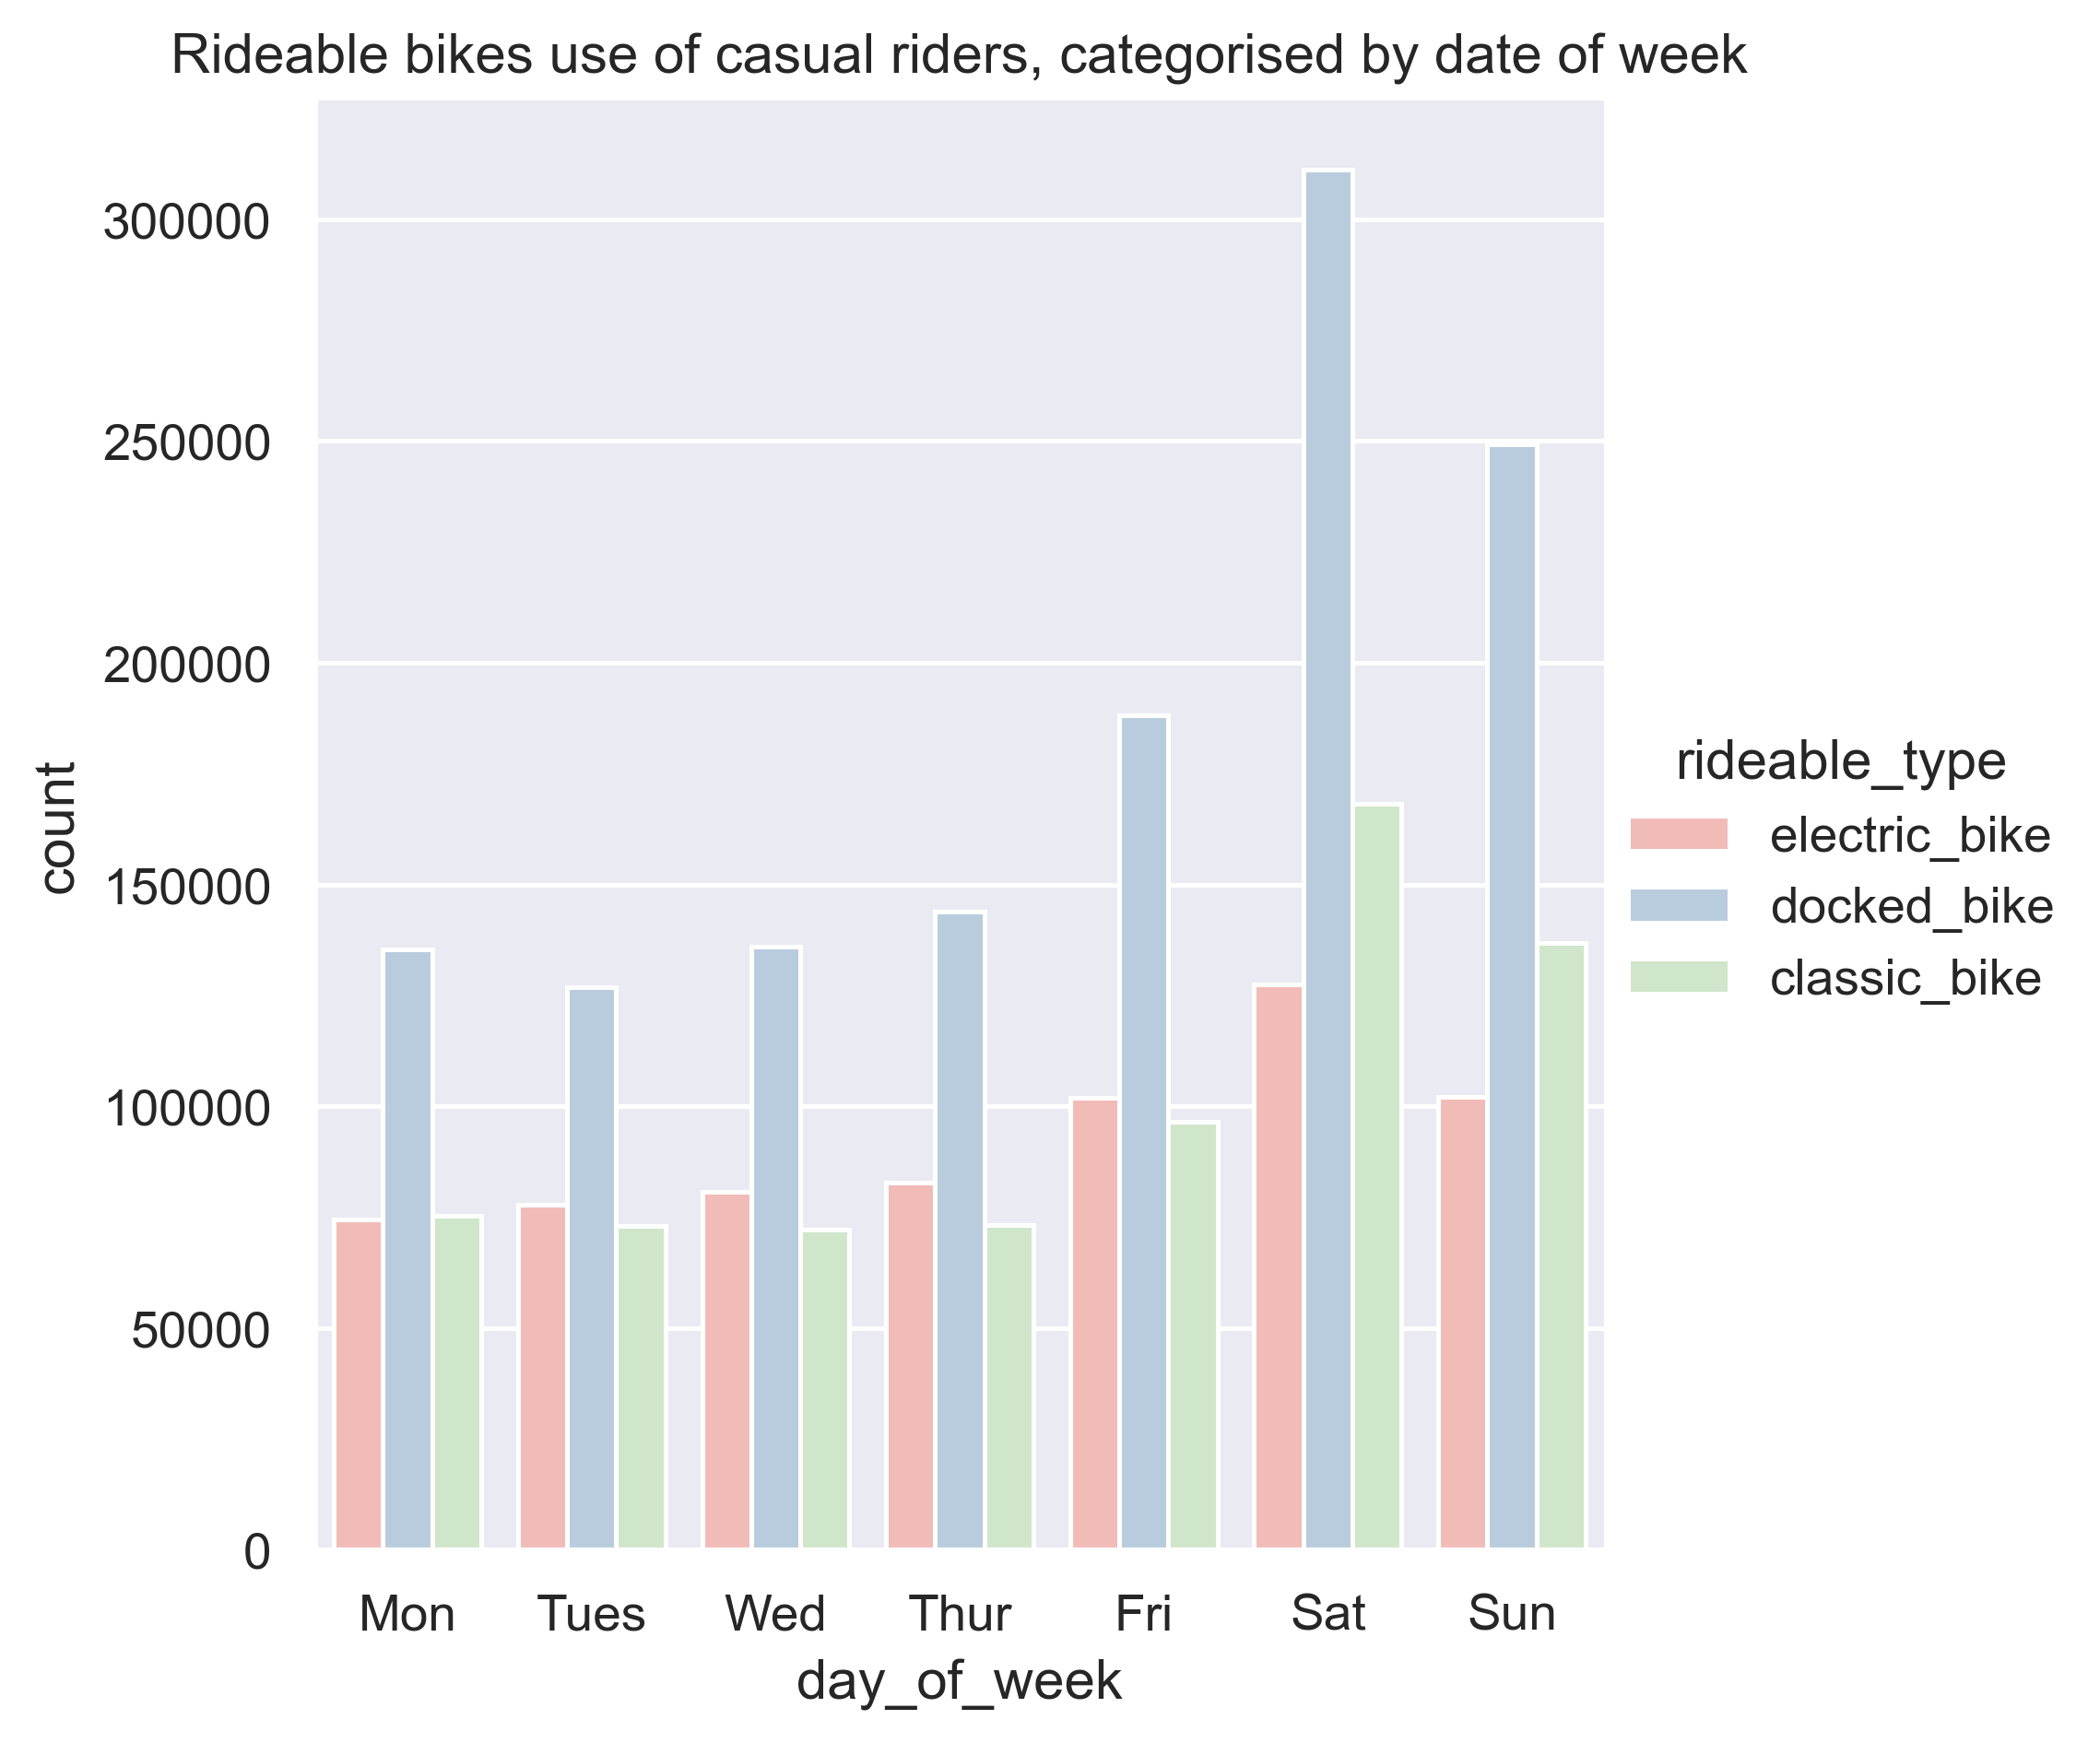

In [144]:
rideable_casual = sns.catplot(x = 'day_of_week', kind = 'count', hue = 'rideable_type', palette = 'Pastel1', data=df_casual)
rideable_casual.set(title = 'Rideable bikes use of casual riders, categorised by date of week')

Patterns:
- Docked bike is the most commonly borrowed vehicle
- (Need testing) Casual riders might be indifferent toward electric bikes and classic bikes
